# Data Analysis Project part 2

### Purpose of this project:

The purpose of this project is to categorize the propety with unsupervised leaning with the data I am collection from craigslist. Analyze each category, so I could predict the rental price I can get from the property you are thinking to buy as investment purpose. 

* Load data that I have been collecting. 
* Add parameters
* Run unsupervised machine leaning to categorize the data. 

In [1]:
from functions import add_params, subplot_by_cluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# As you can tell the number of scraped data is exceeding the number of the post, so I remove duplicate. 
df = pd.read_csv('C:\\Users\\Masa\\Desktop\\Chilliwack Real Estate\\Data\\rental_price_data.csv',
                ).drop('Unnamed: 0', axis=1)
df.sort_values(by="Post Datetime", ascending=False, inplace=True)
df.drop_duplicates(subset="Post Title", inplace=True)
df = df.reset_index(drop=True)
len(df)

17990

In [3]:
data = add_params(df)
data.head()

C:\Users\Masa\Desktop\Chilliwack Real Estate\functions.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bedroom"] = pd.to_numeric(df["Bedroom"], errors='ignore').astype('Int64')
C:\Users\Masa\Desktop\Chilliwack Real Estate\functions.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bedroom"] = df["Bedroom"].fillna(0)


,PostAreaCode,City Code,PostArea_coded,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
0,TORTOR,TOR,5,2023-01-03 13:57:00,2023-01-03,13:57:00,"Duggan Ave 3 Bedroom, 2 Bath Apartment",https://toronto.craigslist.org/tor/apa/d/toron...,deer park,3,0.0,3750,0,0.000000
1,TORTOR,TOR,5,2023-01-03 13:51:00,2023-01-03,13:51:00,This is meant to be - Rentals in Toronto. 2 Be...,https://toronto.craigslist.org/tor/apa/d/this-...,city of toronto,2,649.0,3000,0,4.622496
2,TORTOR,TOR,5,2023-01-03 13:50:00,2023-01-03,13:50:00,2 Bedroom Condo for Rent in Yorkville,https://toronto.craigslist.org/tor/apa/d/toron...,toronto,2,1015.0,3950,0,3.891626
3,TORTOR,TOR,5,2023-01-03 13:35:00,2023-01-03,13:35:00,St.lawrence market locker included luxurious f...,https://toronto.craigslist.org/tor/apa/d/downt...,8 the esplanade,1,0.0,2600,0,0.000000
4,TOROAK,TOR,4,2023-01-03 13:31:00,2023-01-03,13:31:00,Feels brand new 1 year old condo locker included!,https://toronto.craigslist.org/tor/apa/d/toron...,195 redpath ave,2,0.0,2600,0,0.000000


In [4]:
van_data = data[data["City Code"] == "VAN"]
tor_data = data[data["City Code"] == 'TOR']

## Apply to entire data

In [5]:
data["PostArea_coded"].value_counts()

12    4640
5     3927
11    2375
7     1861
0     1786
9     1196
8     1038
10     525
3      311
6      124
2       79
1       78
4       50
Name: PostArea_coded, dtype: int64

In [6]:
# Run KMeans to categorize the properties
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.get_dummies(data[["PostArea_coded", "Bedroom", "SQFT", "Price", "IsFurnished", "Price/SQFT"]])

scaler.fit(X)

kmeans = KMeans(n_clusters=8)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

print(cluster_labels)

[5 5 5 ... 5 5 0]


In [7]:
data['cluster_labels'] = cluster_labels

cluster_label: 0
Length of DataFrame: 10222


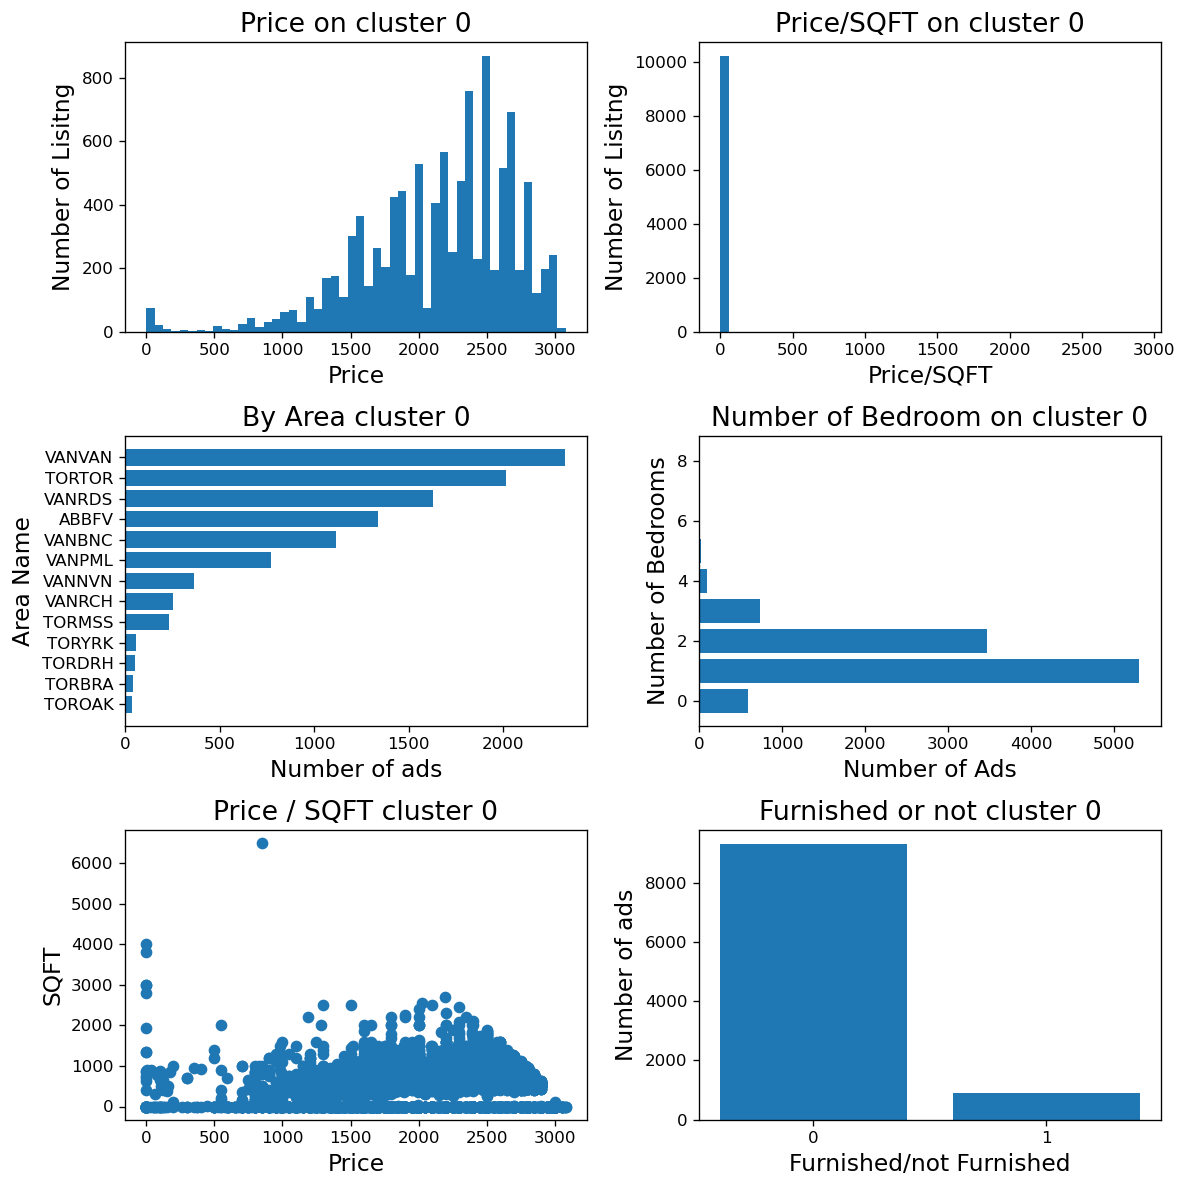

cluster_label: 1
Length of DataFrame: 2


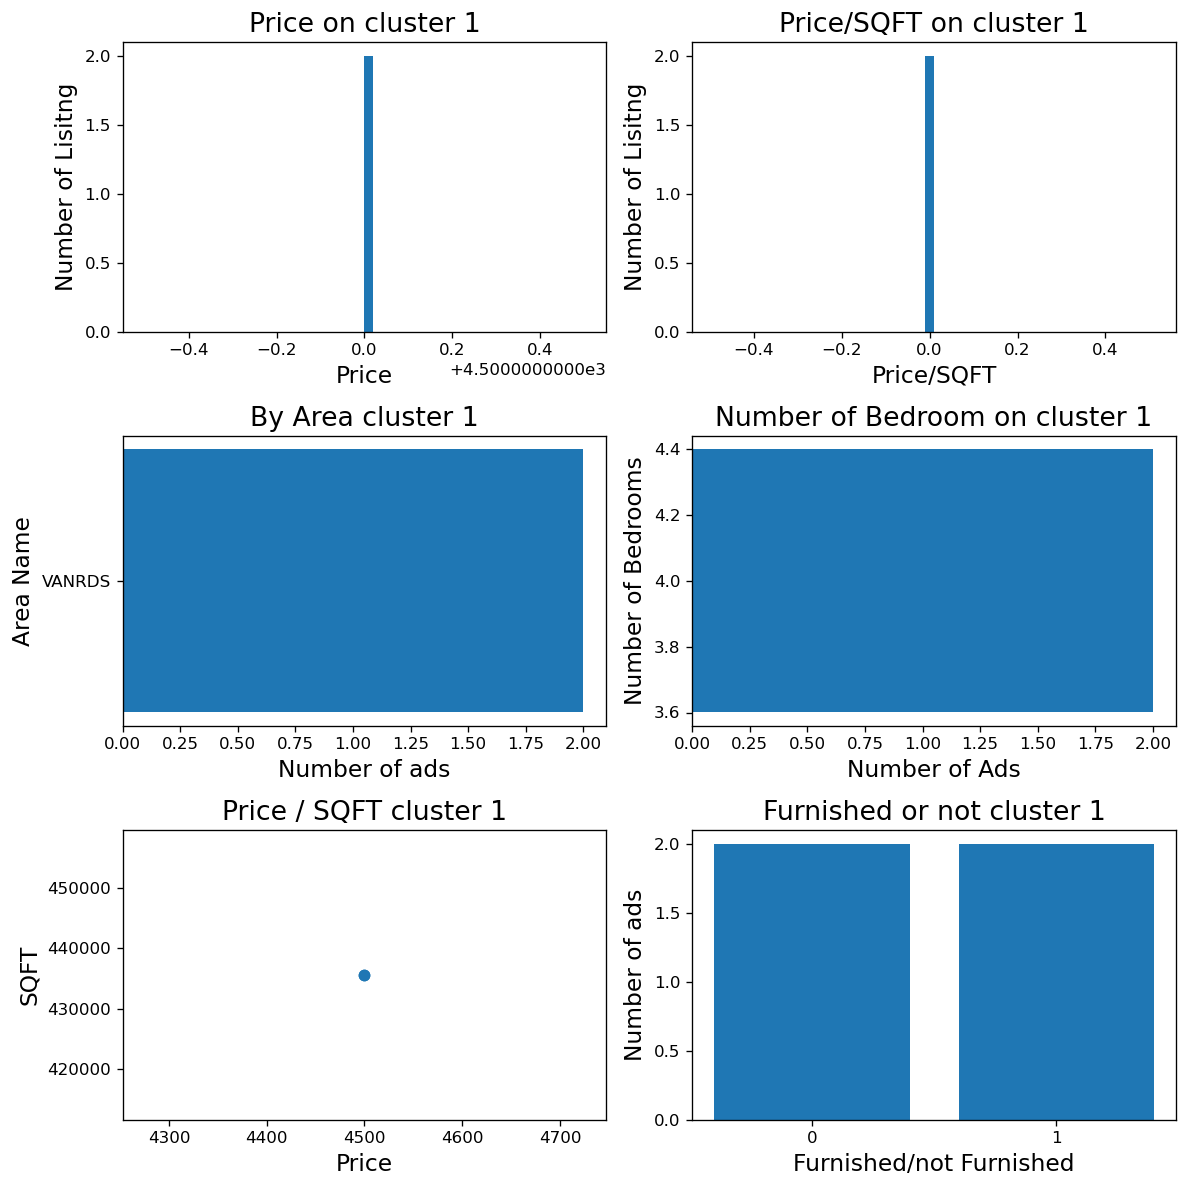

cluster_label: 2
Length of DataFrame: 1078


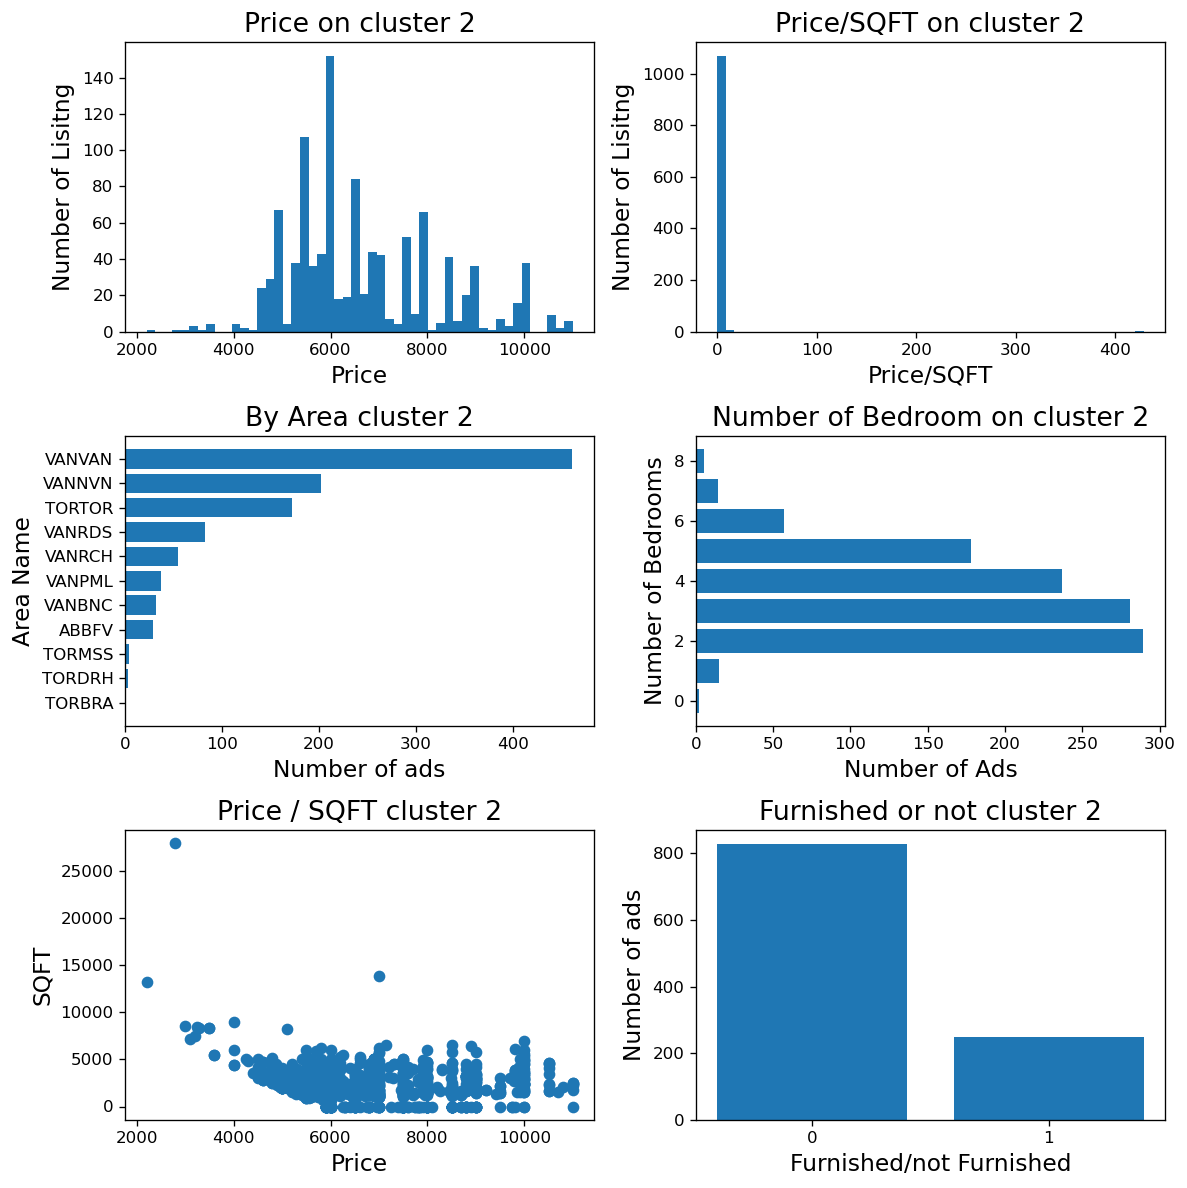

cluster_label: 3
Length of DataFrame: 3


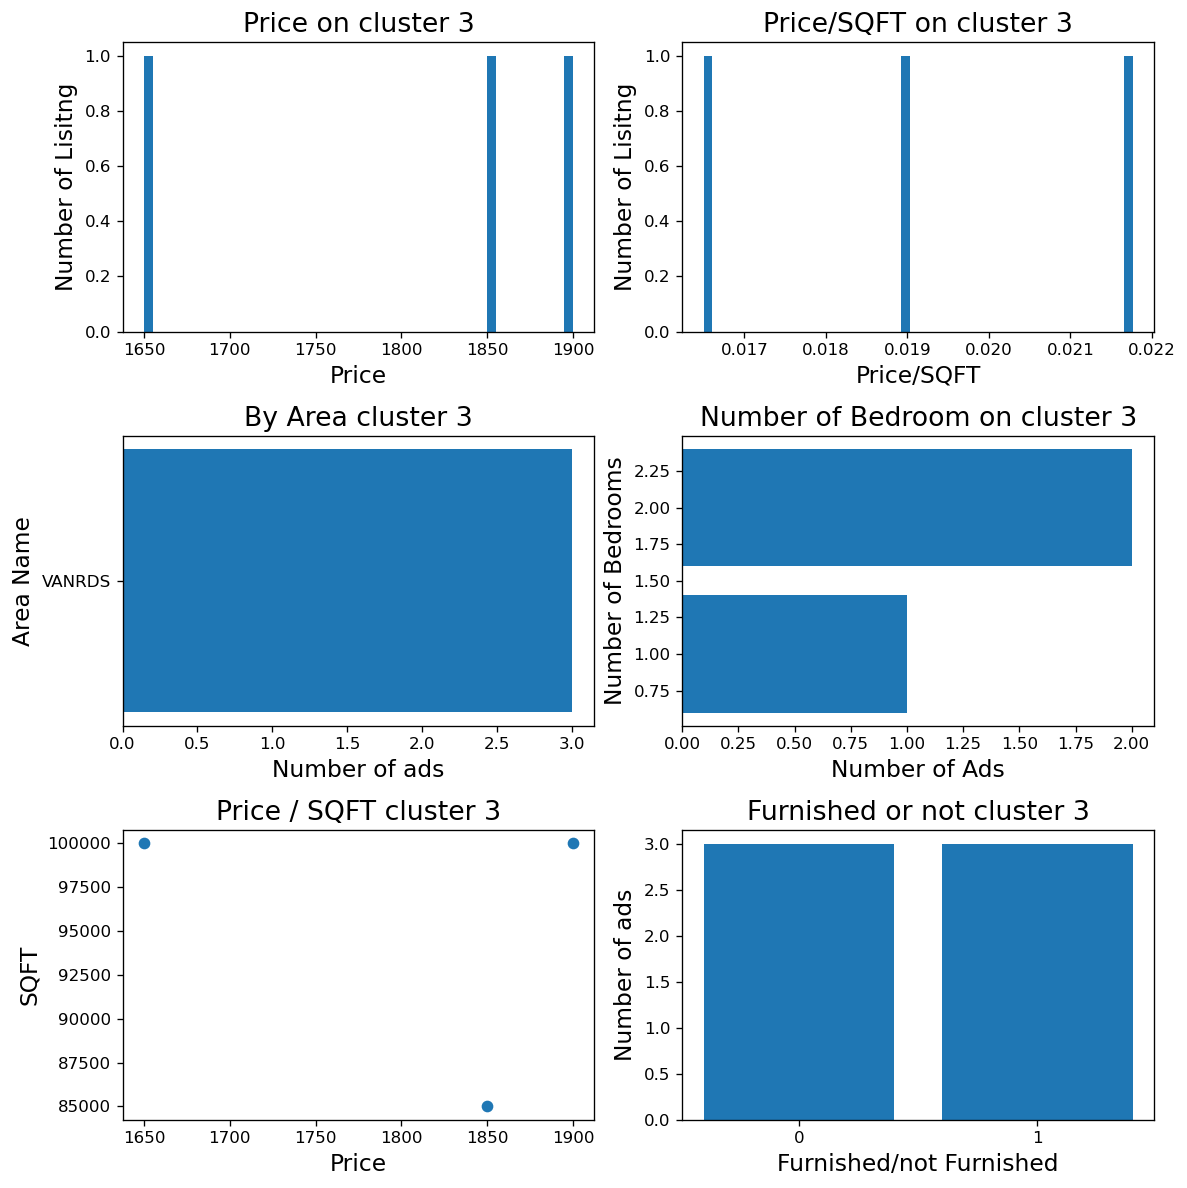

cluster_label: 4
Length of DataFrame: 7


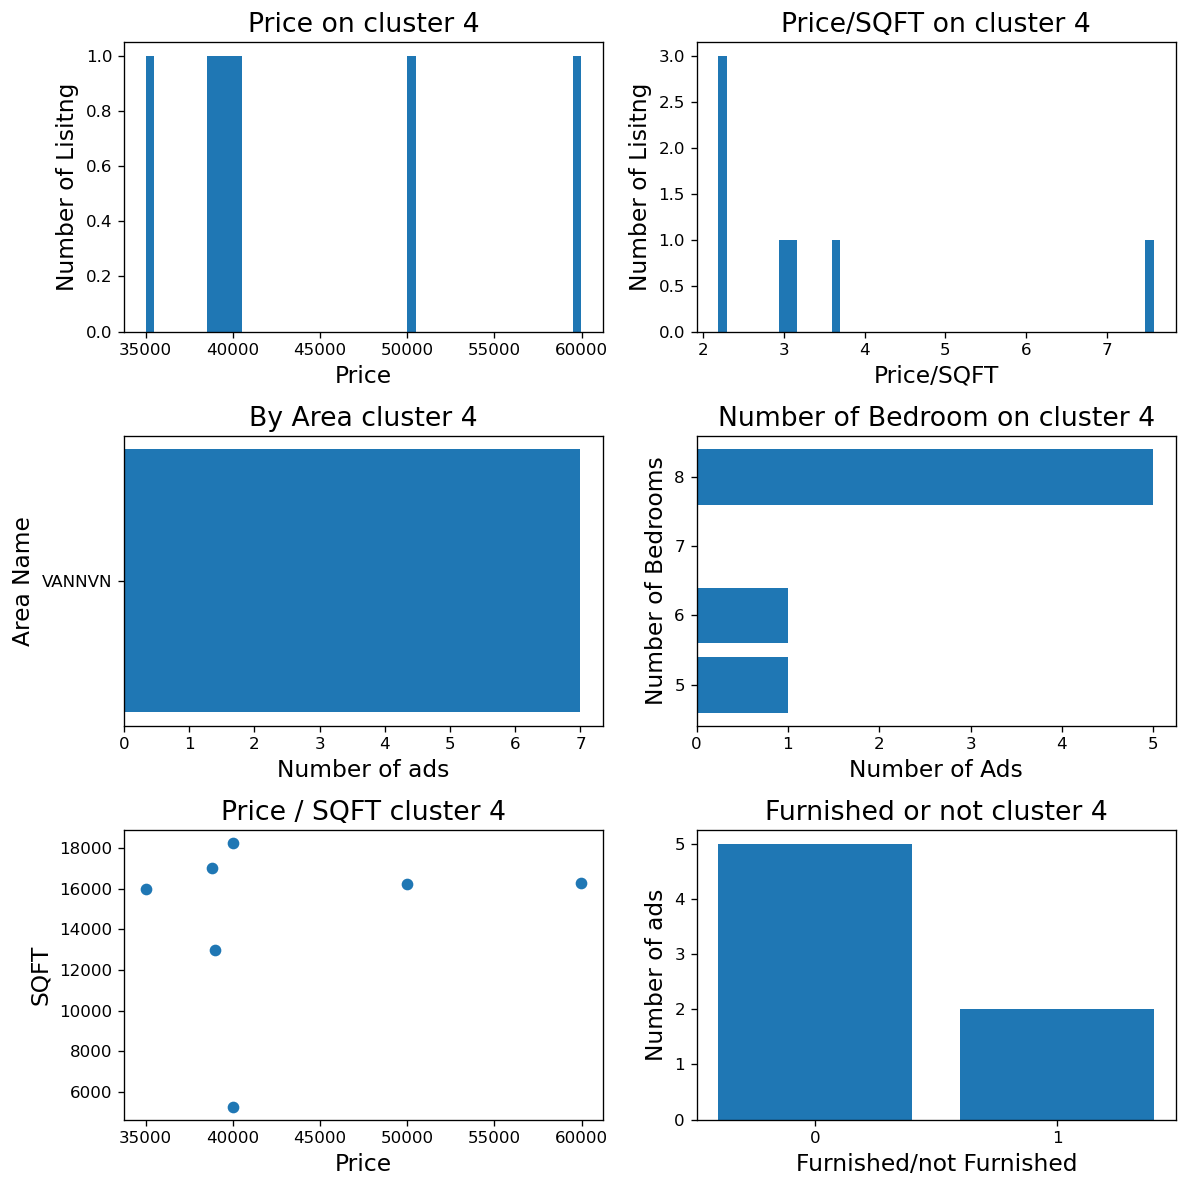

cluster_label: 5
Length of DataFrame: 6531


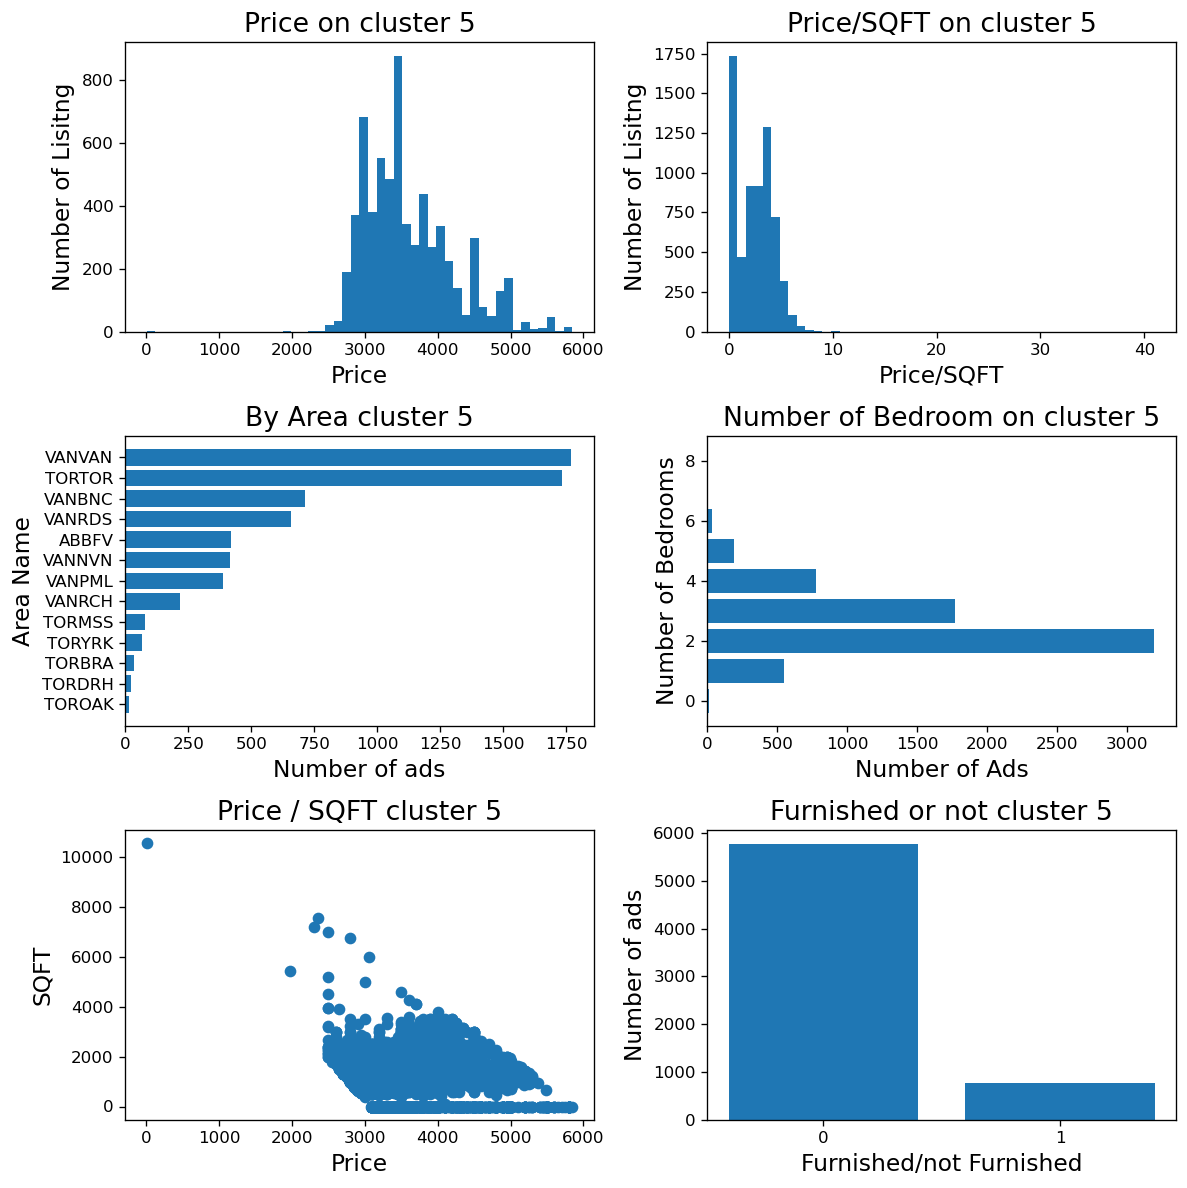

cluster_label: 6
Length of DataFrame: 1


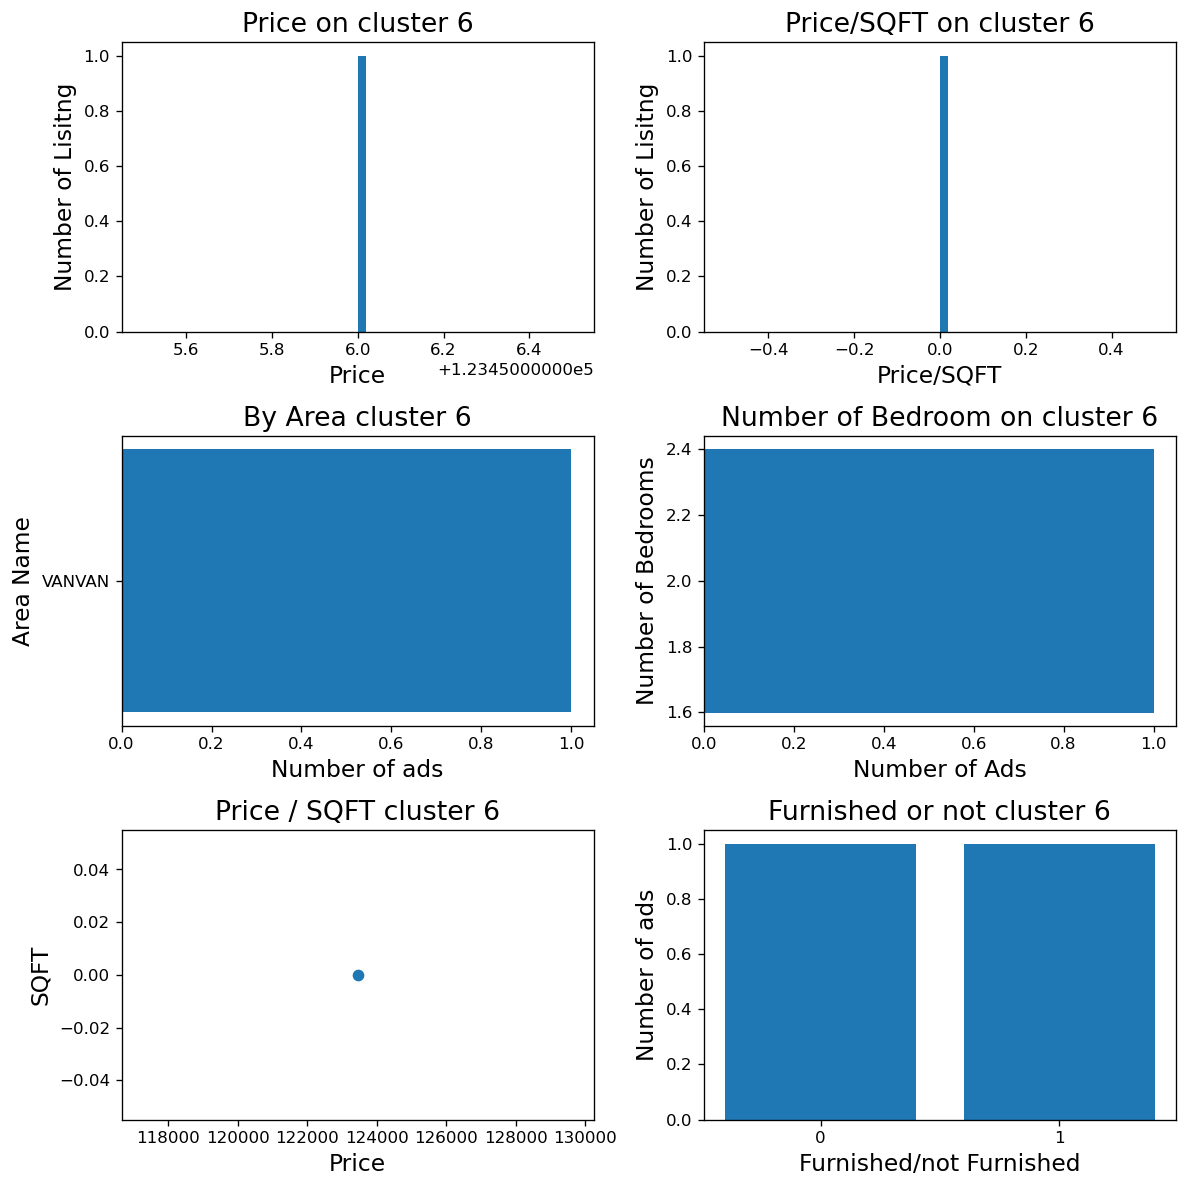

cluster_label: 7
Length of DataFrame: 146


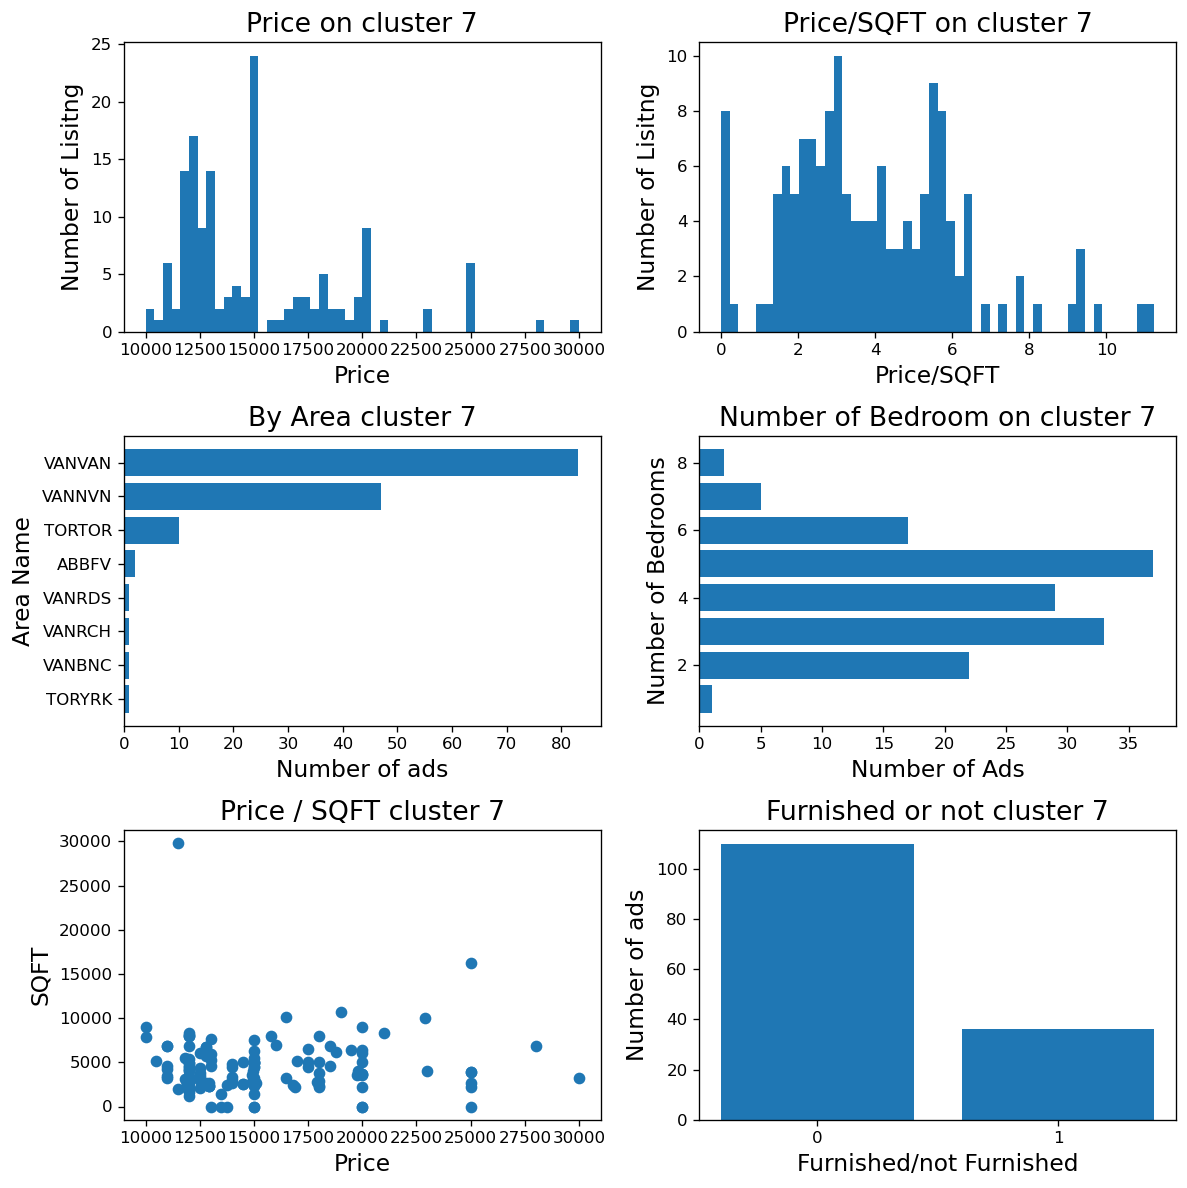

In [8]:
# Plot result by the cluster
for i in range(len(set(cluster_labels))):
    subplot_by_cluster(data, i)

In [17]:
data['IsFurnished'].value_counts()

0    16027
1     1963
Name: IsFurnished, dtype: int64

## Apply same thing to just Vancouver data

In [9]:
# Run KMeans to categorize the properties
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.get_dummies(van_data[["PostArea_coded", "Bedroom", "SQFT", "Price", "IsFurnished", "Price/SQFT"]])

scaler.fit(X)

kmeans = KMeans(n_clusters=8)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

print(cluster_labels)

[7 7 7 ... 7 0 7]


In [10]:
van_data["cluster_labels"] = cluster_labels

C:\Users\Masa\AppData\Local\Temp\ipykernel_21820\3464756517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  van_data["cluster_labels"] = cluster_labels


cluster_label: 0
Length of DataFrame: 3811


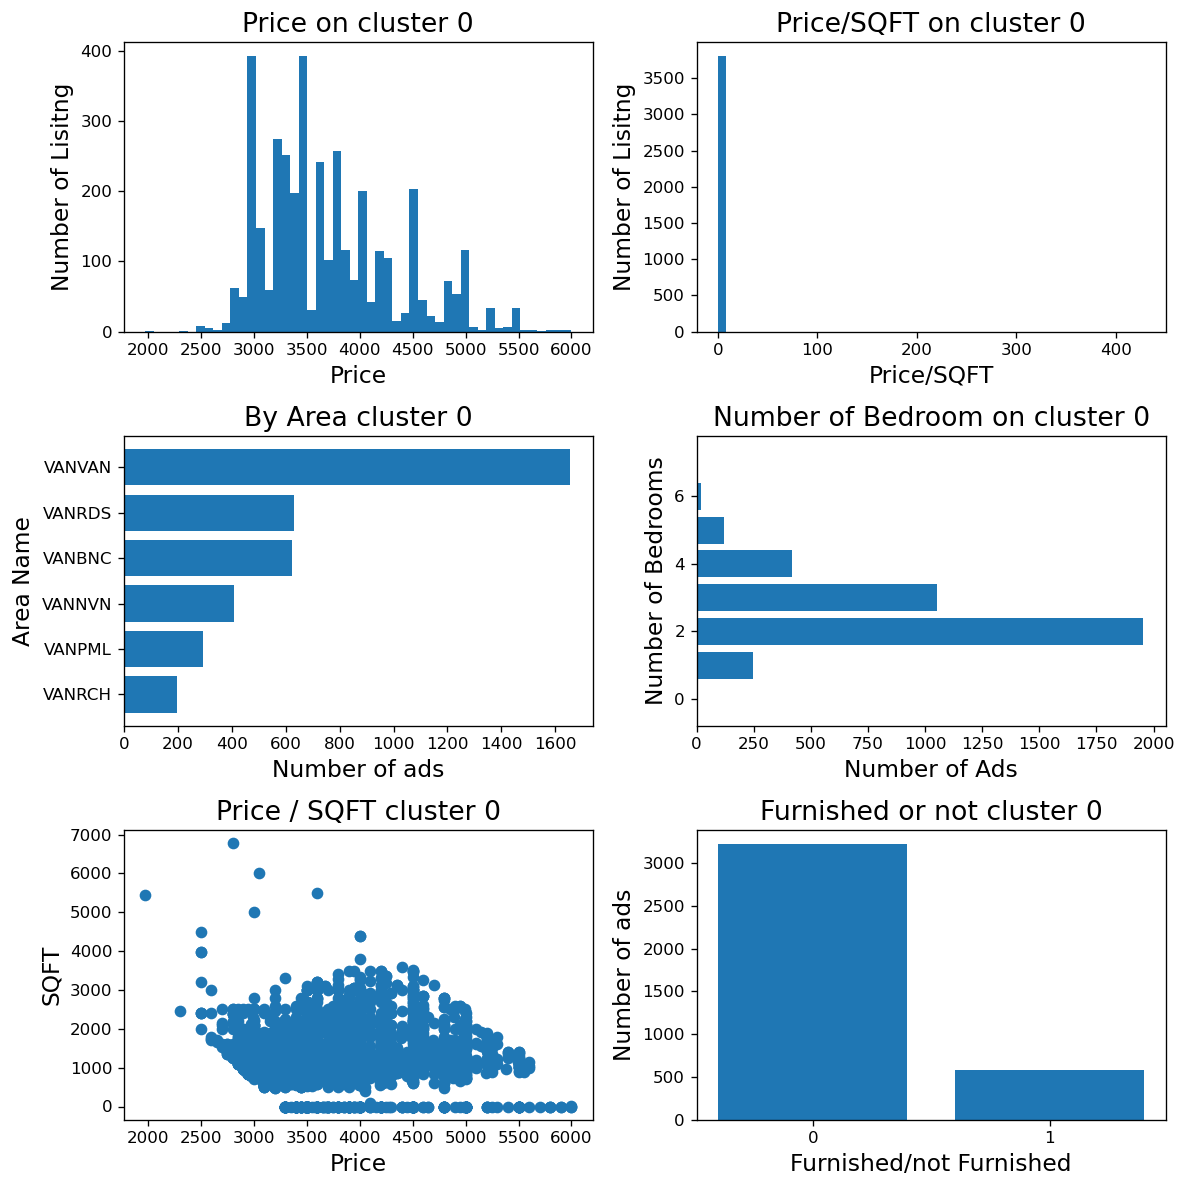

cluster_label: 1
Length of DataFrame: 2


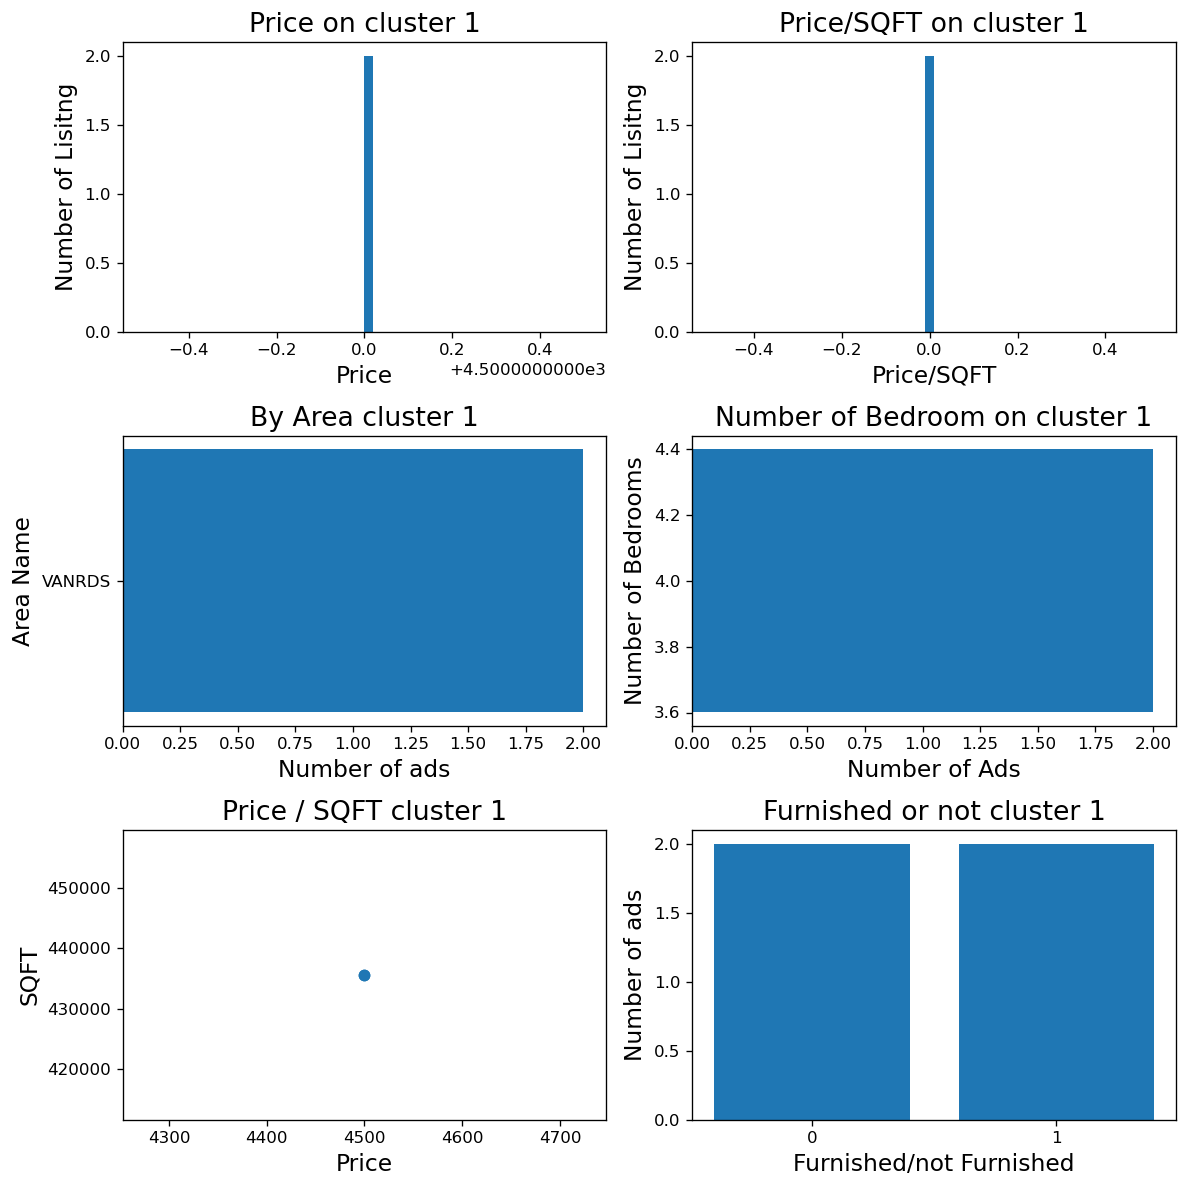

cluster_label: 2
Length of DataFrame: 130


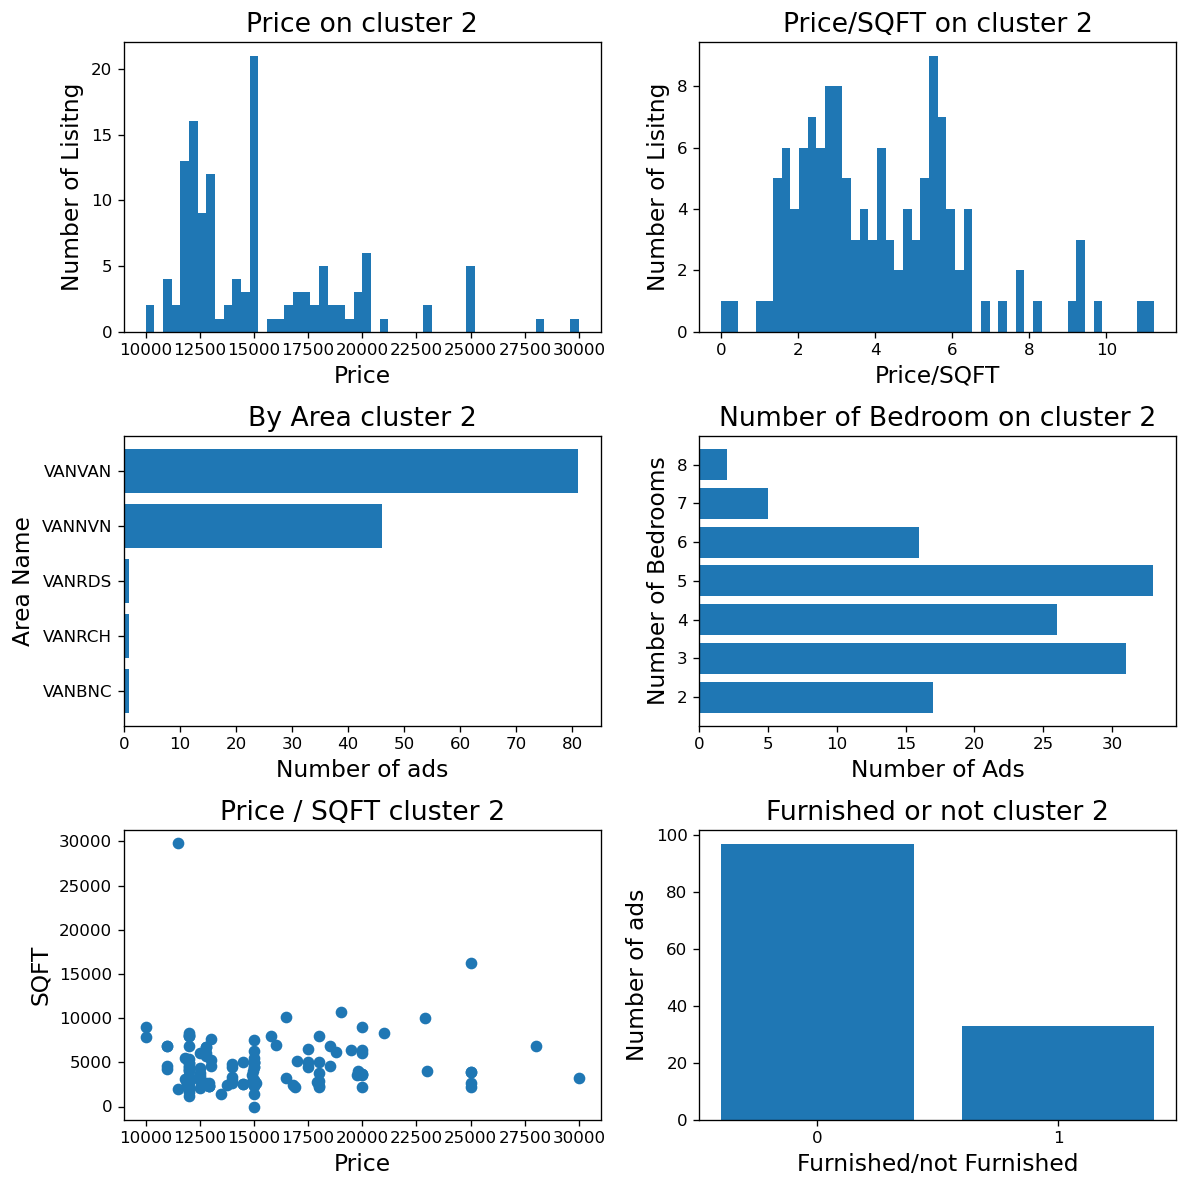

cluster_label: 3
Length of DataFrame: 3


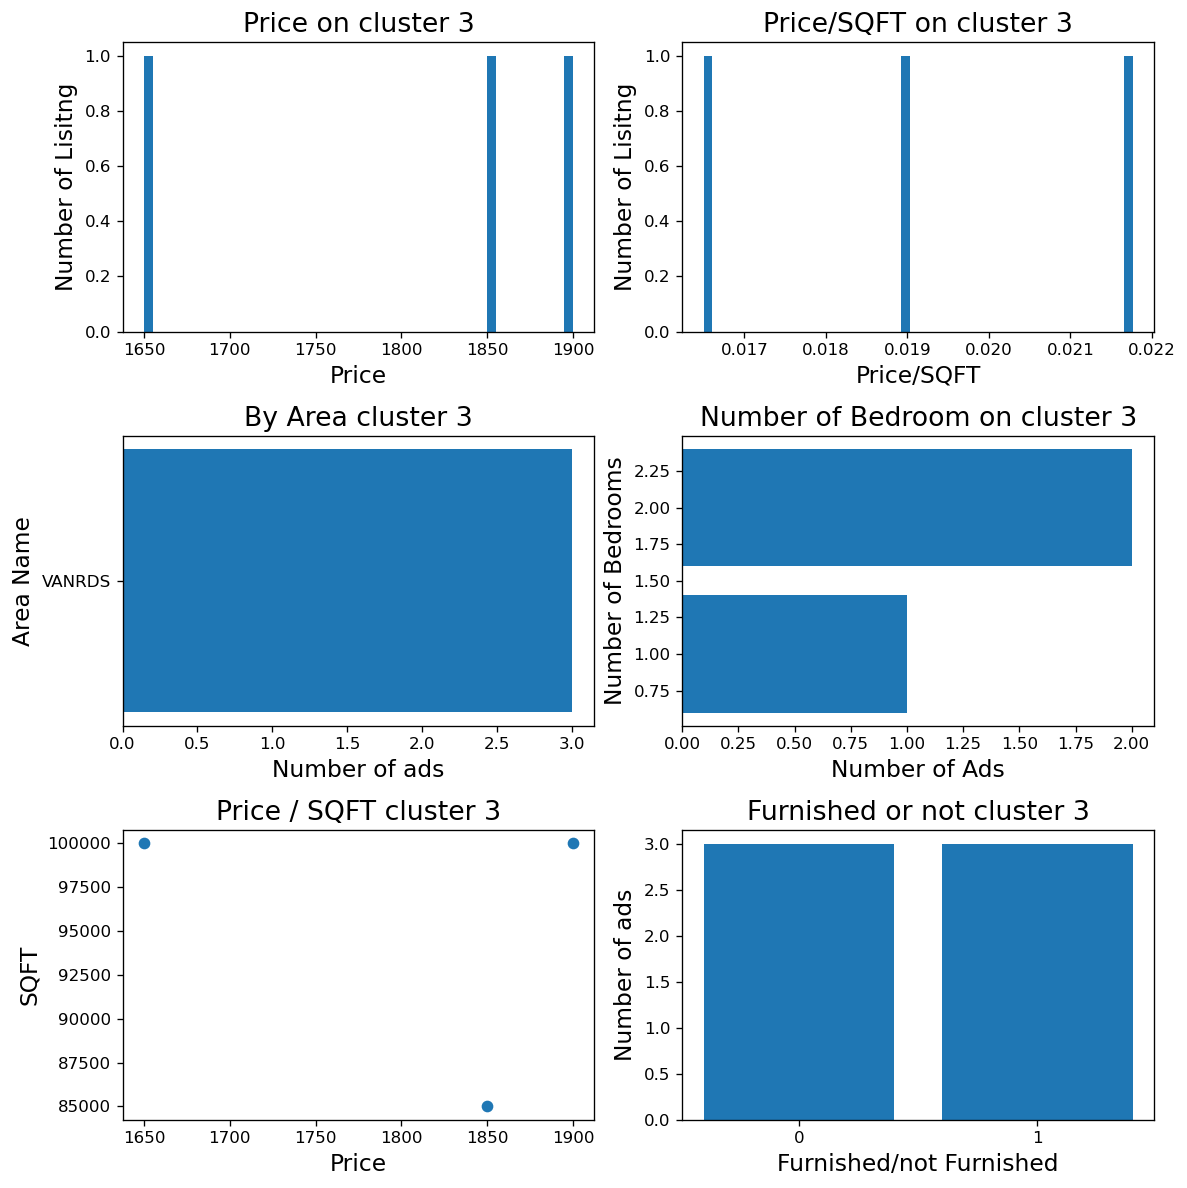

cluster_label: 4
Length of DataFrame: 1


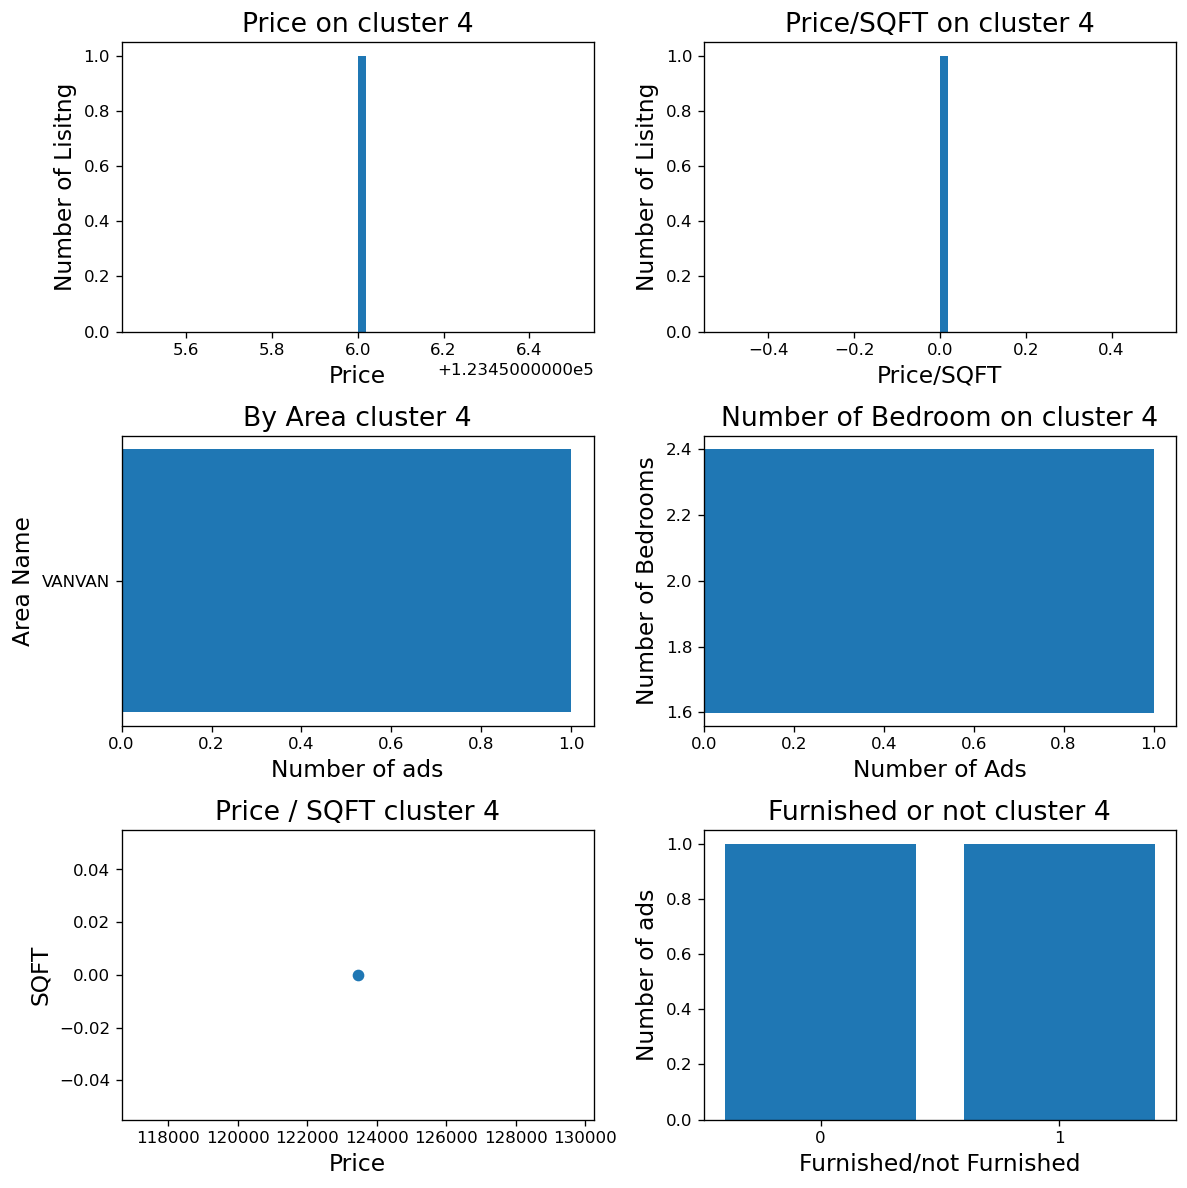

cluster_label: 5
Length of DataFrame: 7


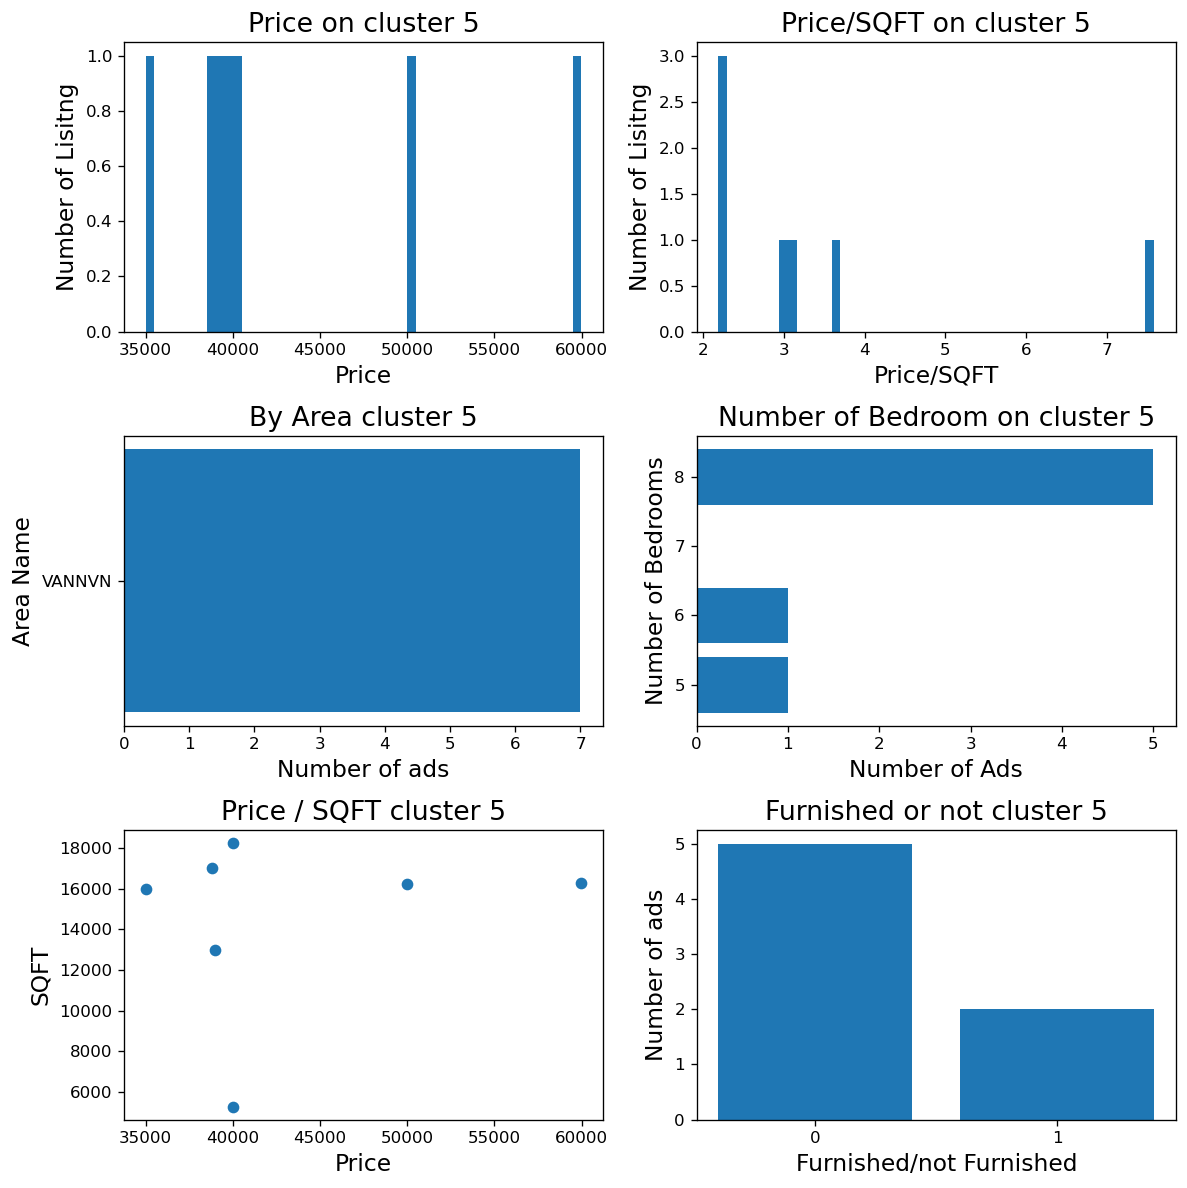

cluster_label: 6
Length of DataFrame: 766


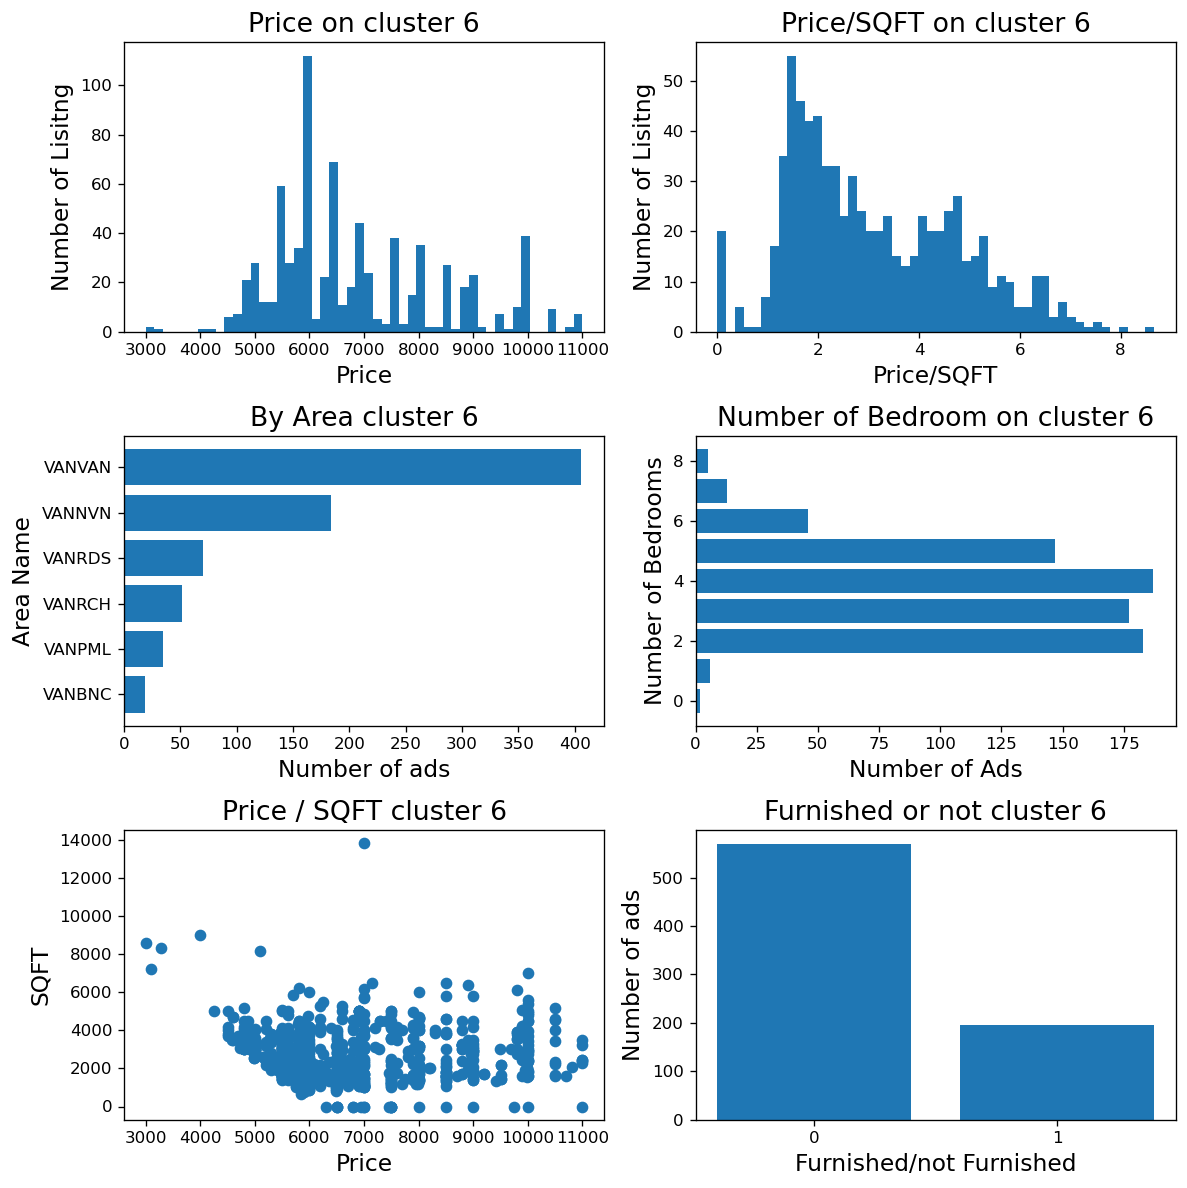

cluster_label: 7
Length of DataFrame: 6915


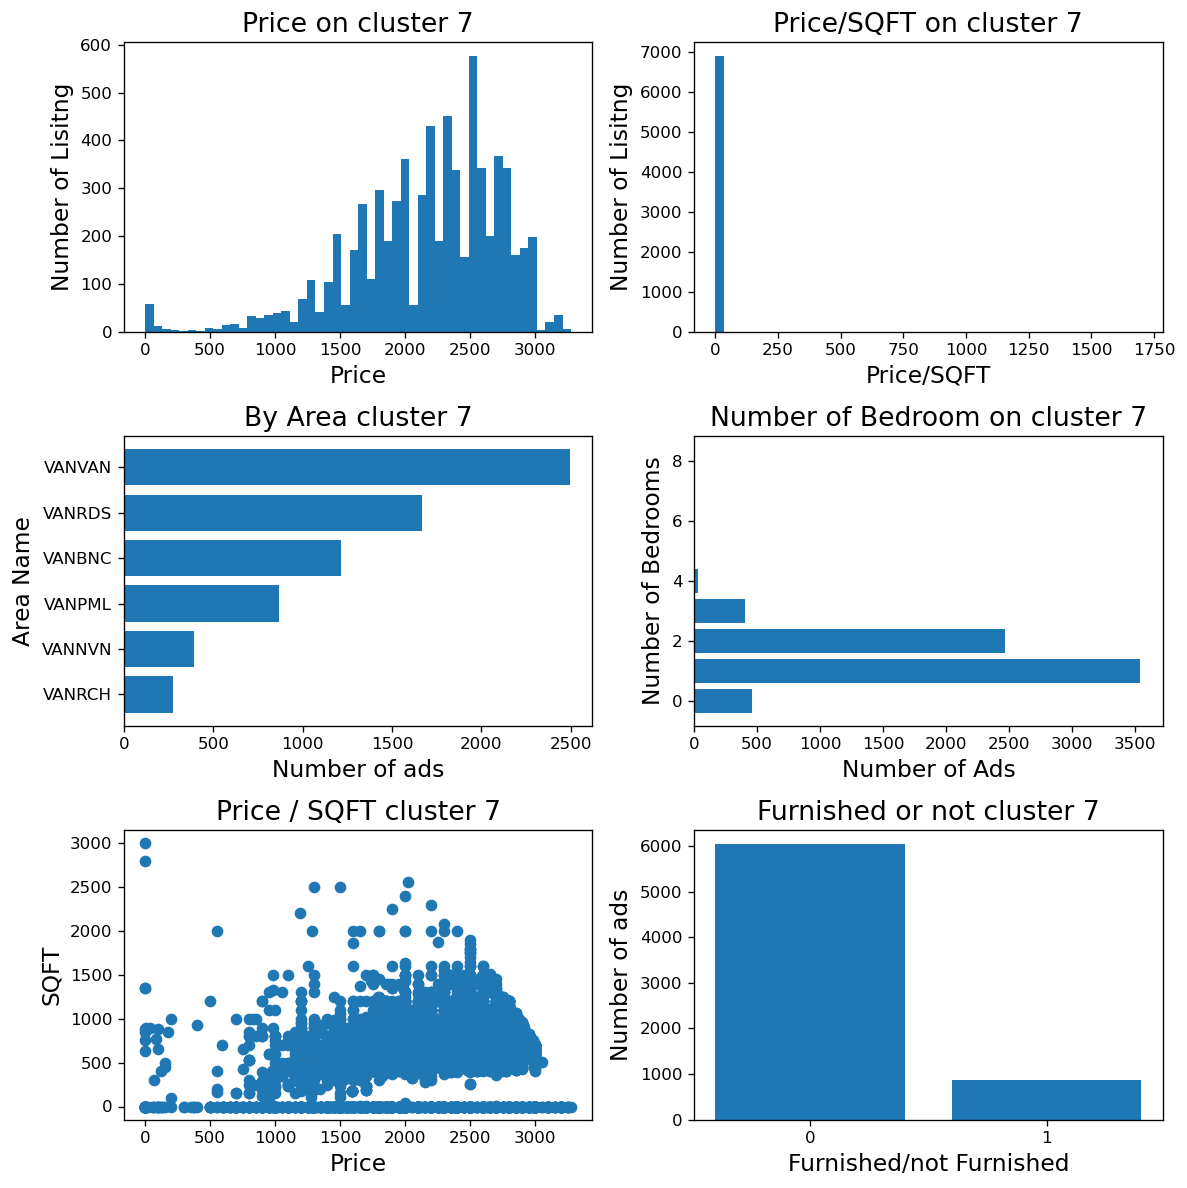

In [11]:
# Plot result by the cluster
for i in range(len(set(cluster_labels))):
    subplot_by_cluster(van_data, i)

In [16]:
van_data['IsFurnished'].value_counts()

0    9952
1    1683
Name: IsFurnished, dtype: int64

## Apply same thing to just Toronto data

In [12]:
# Run KMeans to categorize the properties
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.get_dummies(tor_data[["PostArea_coded", "Bedroom", "SQFT", "Price", "IsFurnished", "Price/SQFT"]])

scaler.fit(X)

kmeans = KMeans(n_clusters=8)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

print(cluster_labels)

[6 0 3 ... 0 0 6]


In [13]:
tor_data['cluster_labels'] = cluster_labels

C:\Users\Masa\AppData\Local\Temp\ipykernel_21820\2018389399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tor_data['cluster_labels'] = cluster_labels


cluster_label: 0
Length of DataFrame: 1759


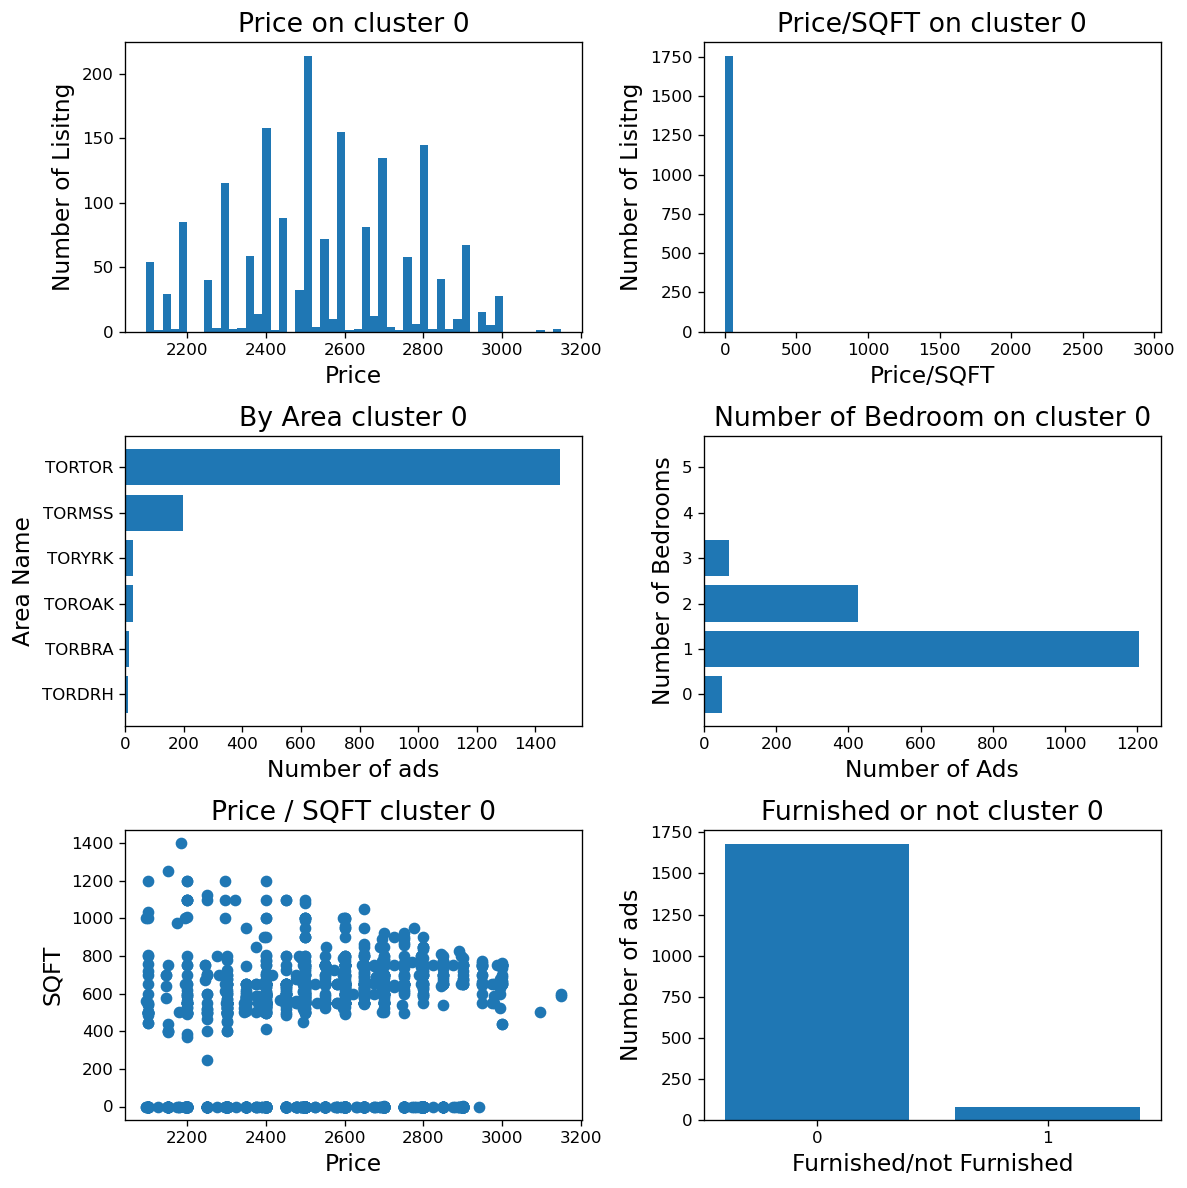

cluster_label: 1
Length of DataFrame: 96


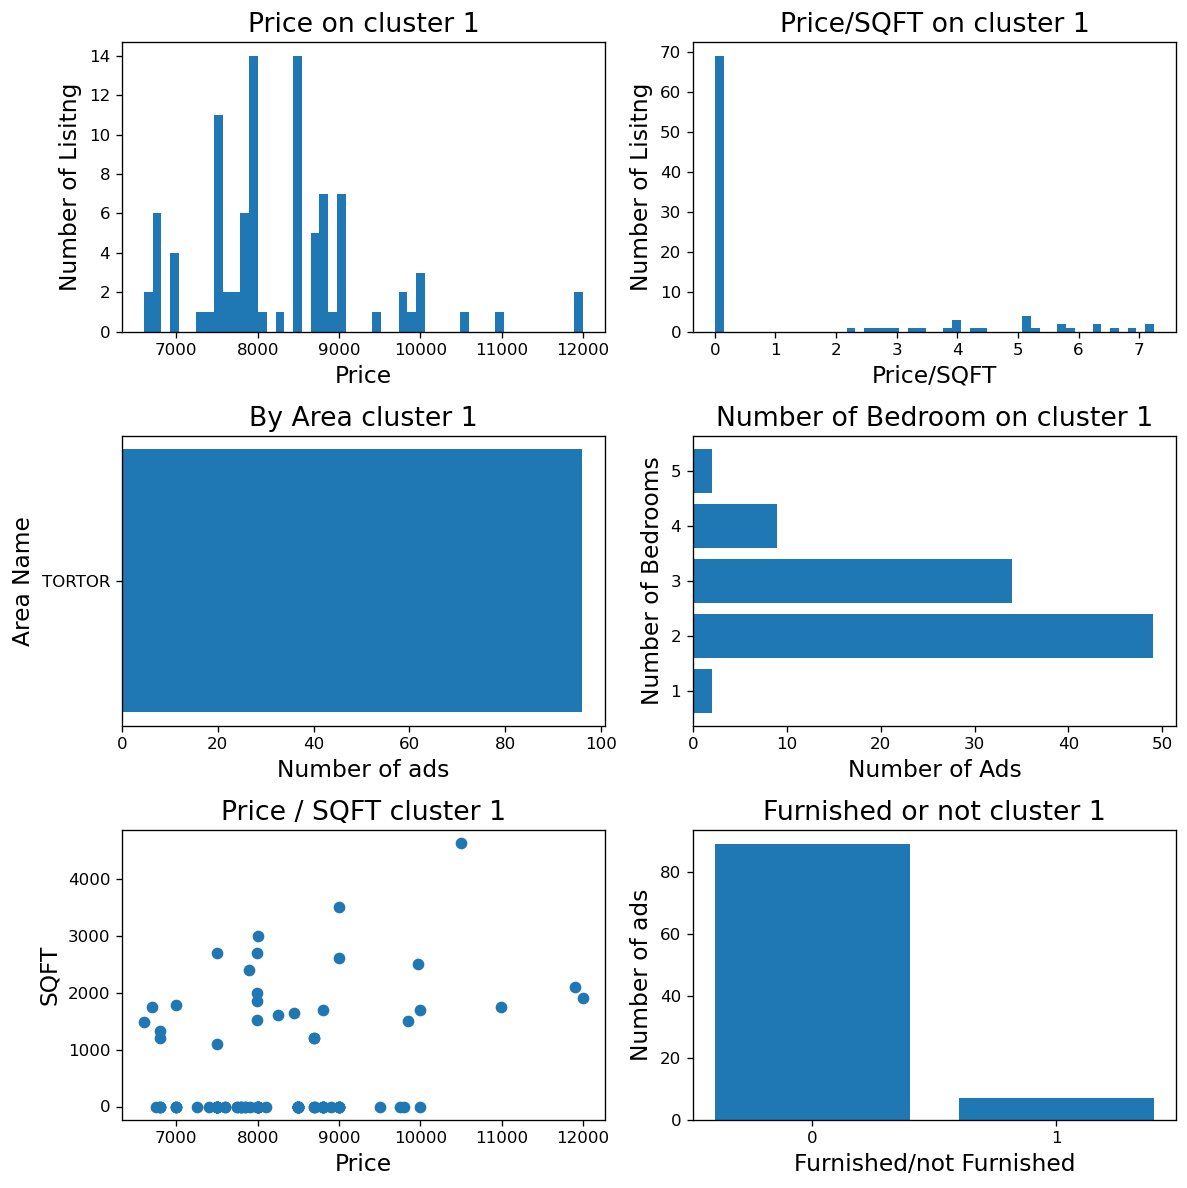

cluster_label: 2
Length of DataFrame: 413


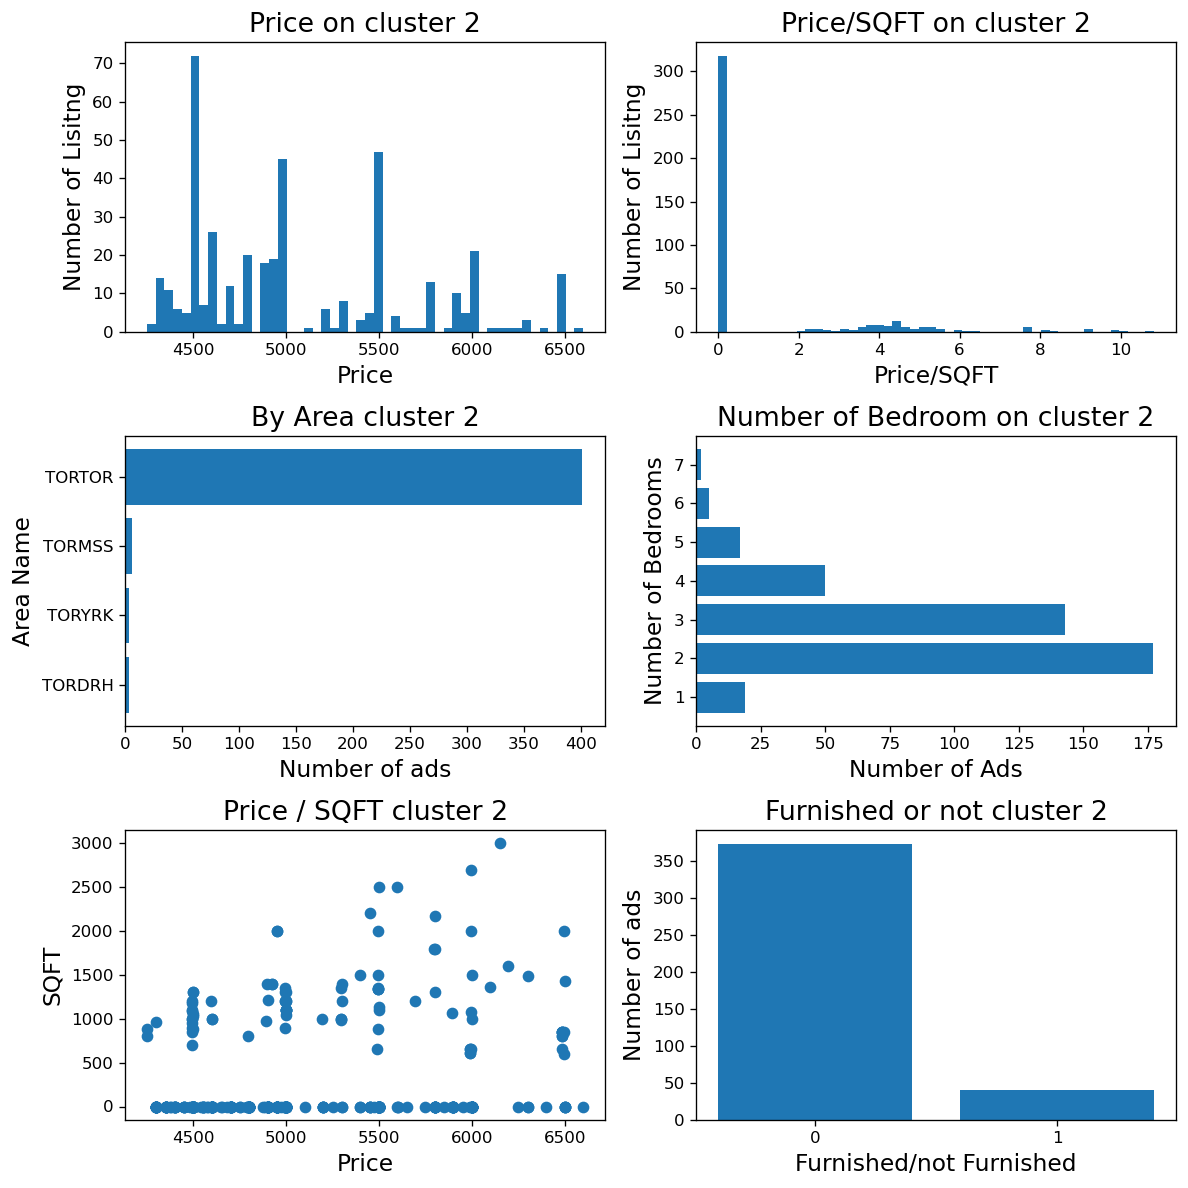

cluster_label: 3
Length of DataFrame: 506


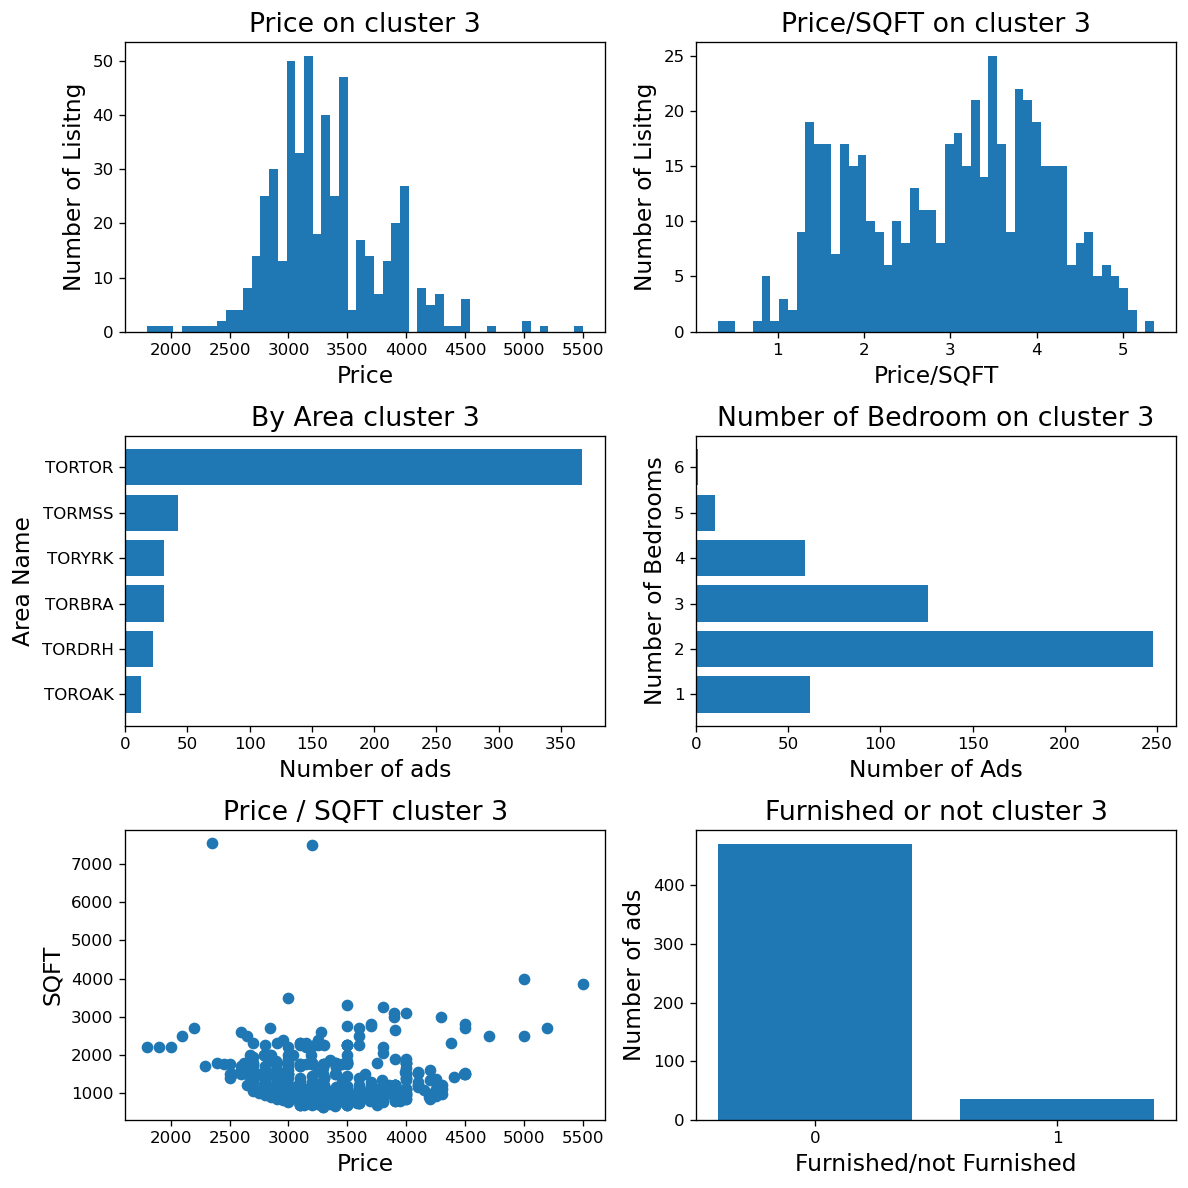

cluster_label: 4
Length of DataFrame: 9


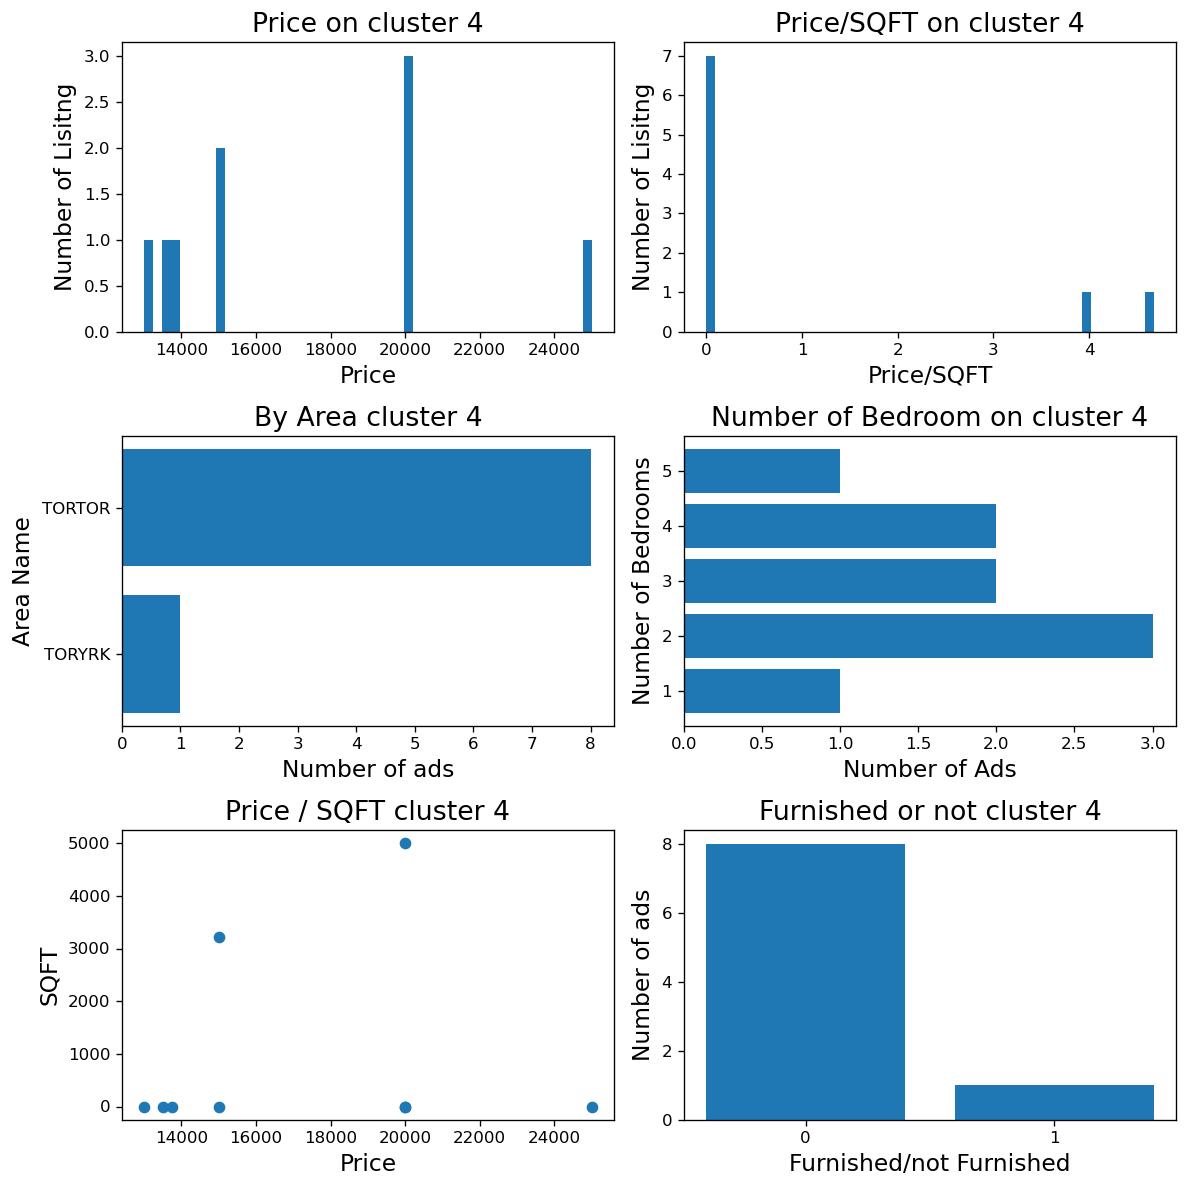

cluster_label: 5
Length of DataFrame: 1


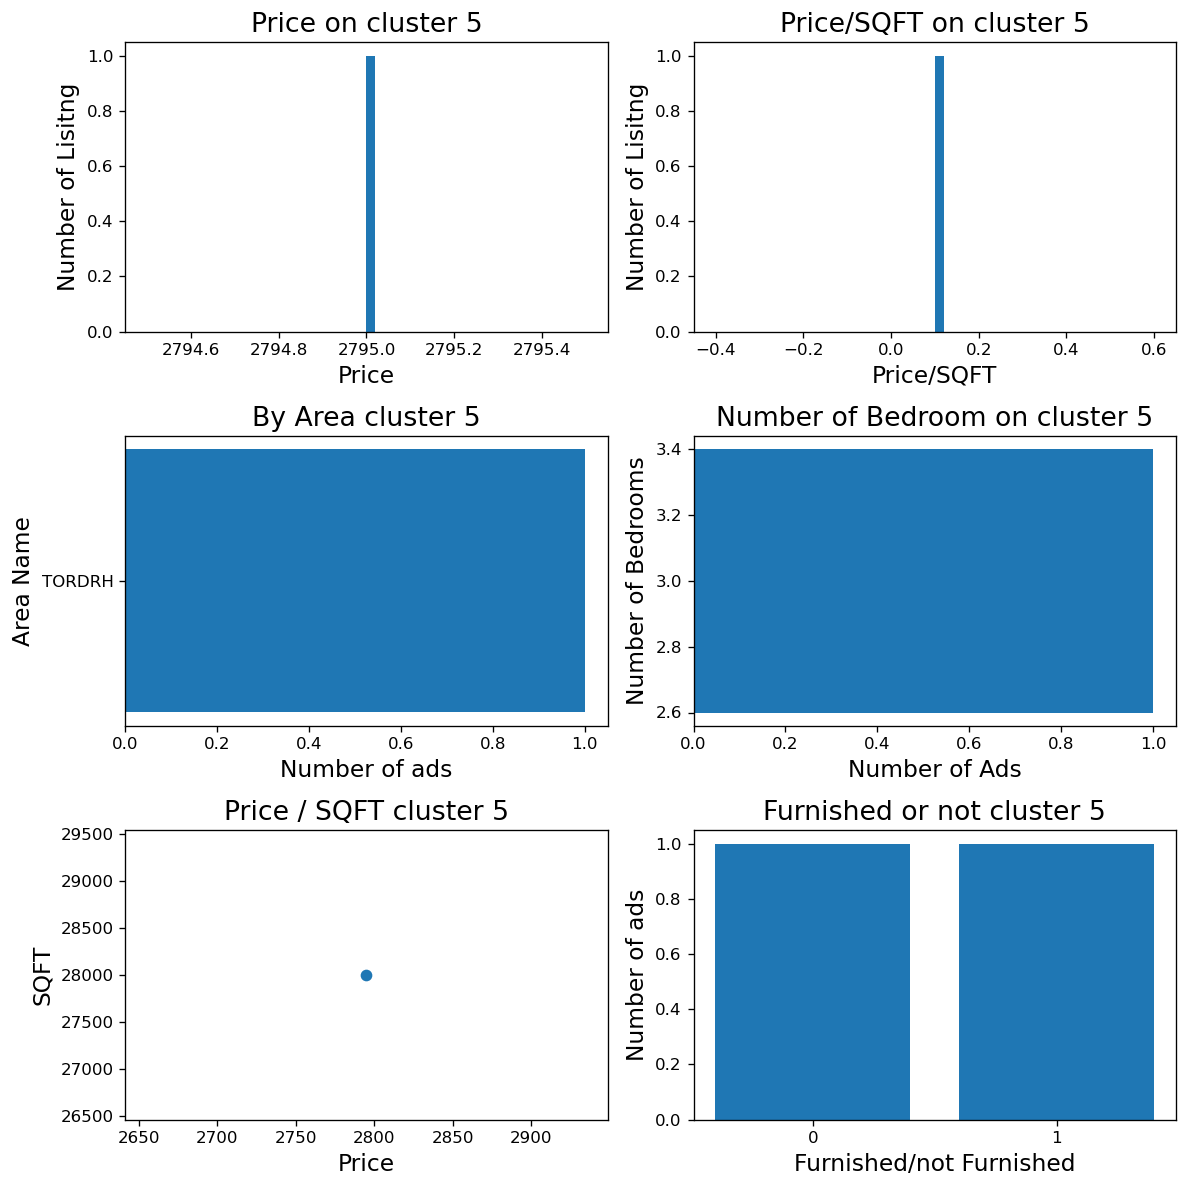

cluster_label: 6
Length of DataFrame: 1292


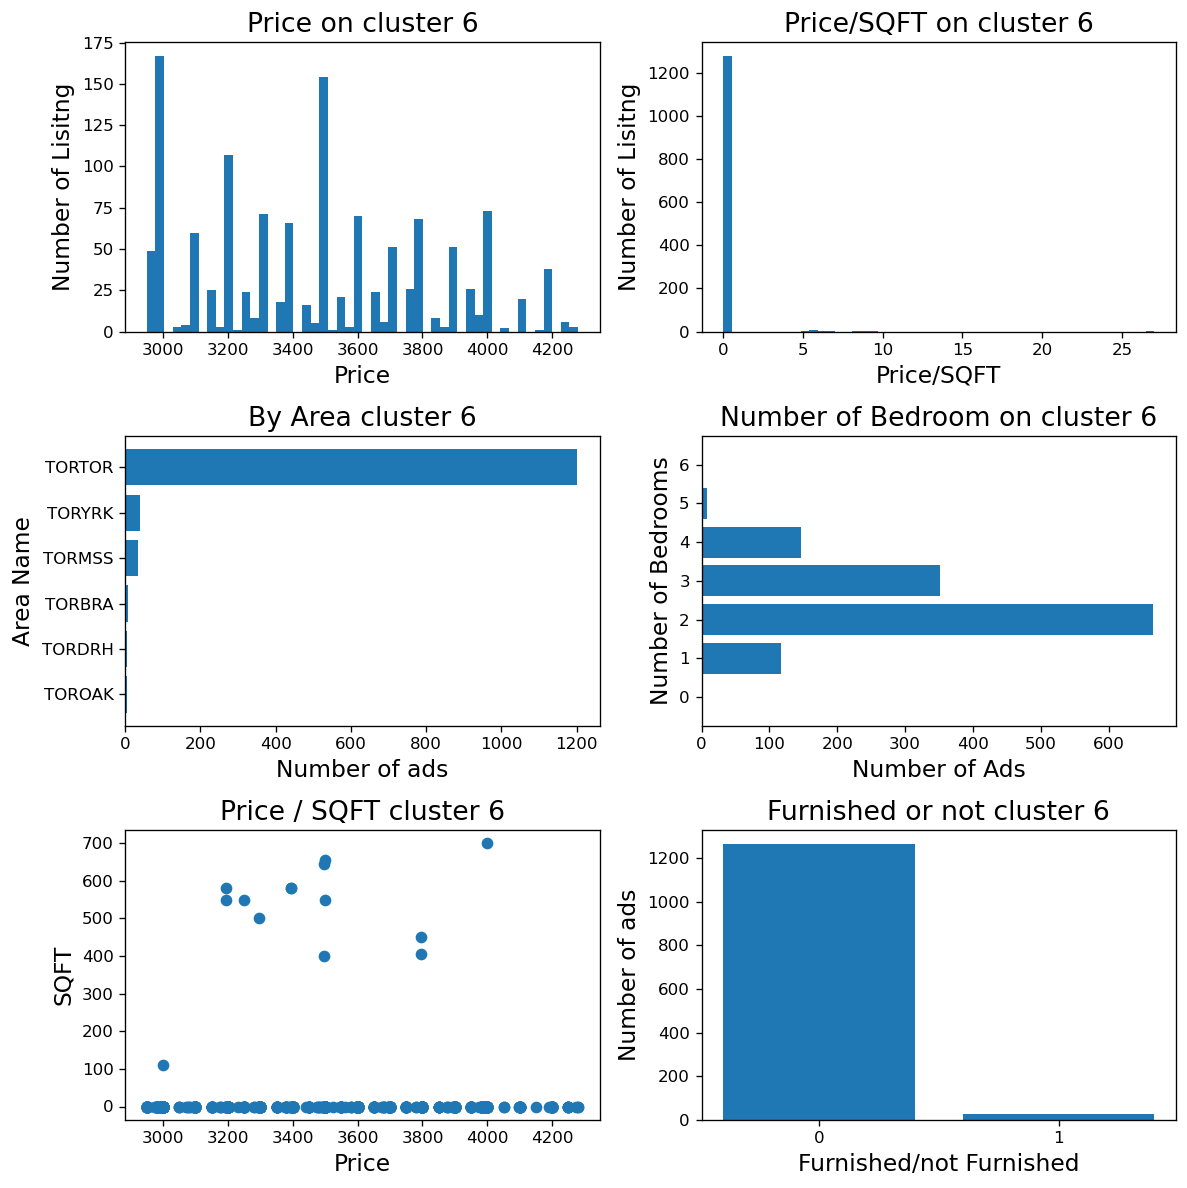

cluster_label: 7
Length of DataFrame: 493


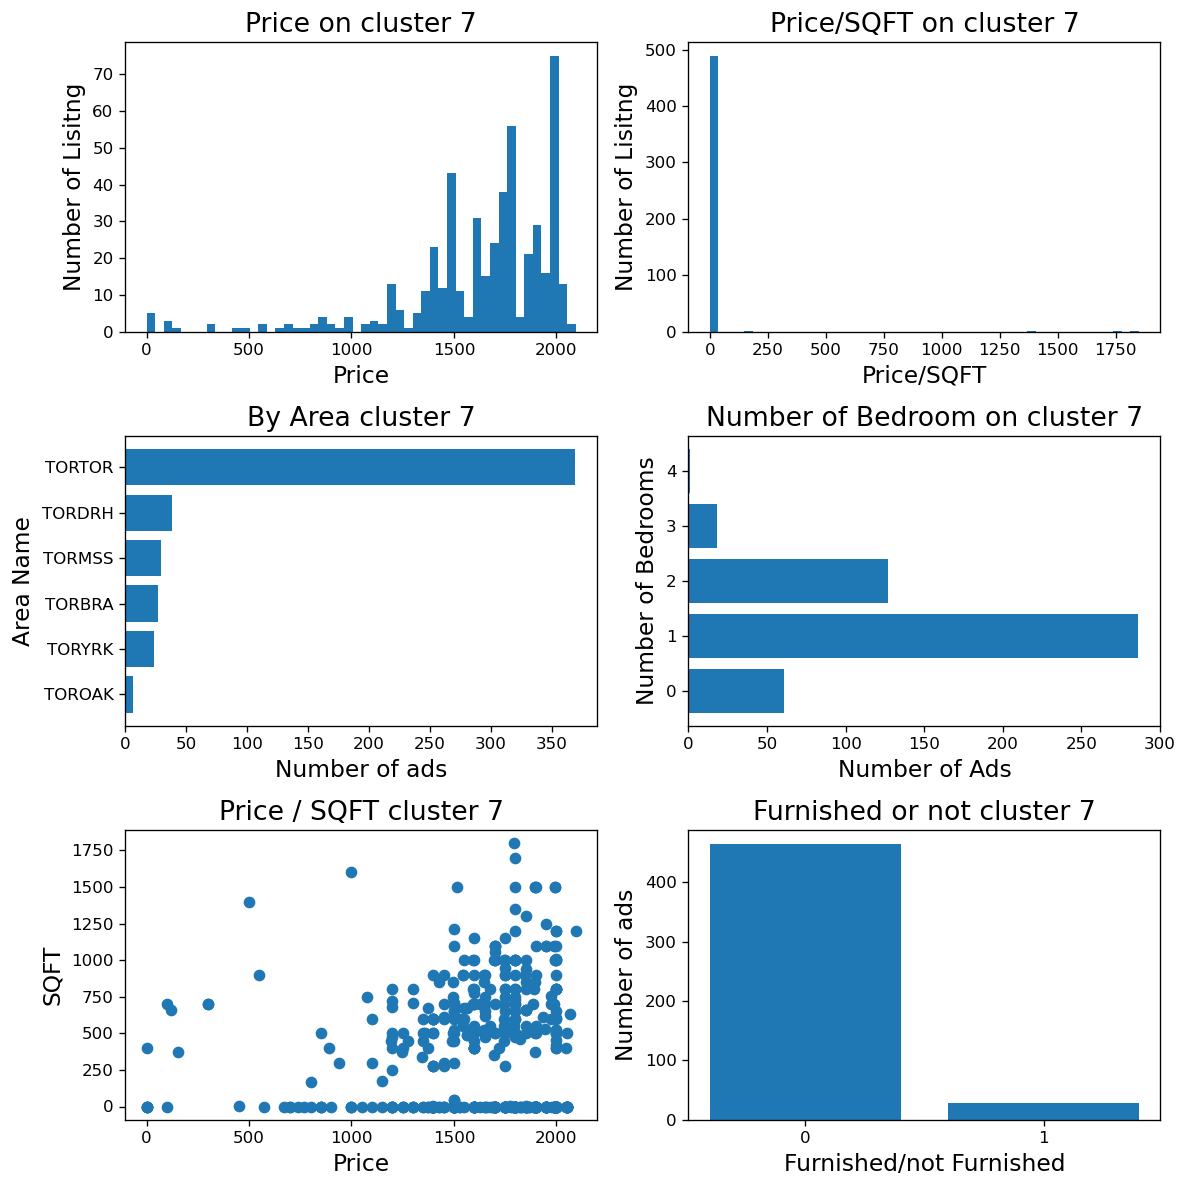

In [14]:
# Plot result by the cluster
for i in range(len(set(cluster_labels))):
    subplot_by_cluster(tor_data, i)

In [15]:
tor_data['IsFurnished'].value_counts()

0    4355
1     214
Name: IsFurnished, dtype: int64